# QUESTION 1: Factors that impact salary

### To predict salary you will be building either a classification or regression model, using features like the location, title, and summary of the job. If framing this as a regression problem, you will be estimating the listed salary amounts. You may instead choose to frame this as a classification problem, in which case you will create labels from these salaries (high vs. low salary, for example) according to thresholds (such as median salary).

### You have learned a variety of new skills and models that may be useful for this problem:

    NLP
    Unsupervised learning and dimensionality reduction techniques (PCA, clustering)
    Ensemble methods and decision tree models
    SVM models

### Whatever you decide to use, the most important thing is to justify your choices and interpret your results. Communication of your process is key. Note that most listings DO NOT come with salary information. You'll need to able to extrapolate or predict the expected salaries for these listings.

# QUESTION 2: Factors that distinguish job category

### Using the job postings you scraped for part 1 (or potentially new job postings from a second round of scraping), identify features in the data related to job postings that can distinguish job titles from each other. There are a variety of interesting ways you can frame the target variable, for example:

    What components of a job posting distinguish data scientists from other data jobs?
    What features are important for distinguishing junior vs. senior positions?
    Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?

### You may end up making multiple classification models to tackle different questions. Be sure to clearly explain your hypotheses and framing, any feature engineering, and what your target variables are. The type of classification model you choose is up to you. Be sure to interpret your results and evaluate your models' performance.

# BONUS PROBLEM

### Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs. Plot the ROC curve.

In [3]:
import pandas as pd 
import numpy as np
import urllib
import matplotlib.pyplot as plt
from selenium import webdriver
from bs4 import BeautifulSoup
import requests
from time import sleep
import pickle

# Function to get the search results of Jobs posted in INDEED job portal.
    

In [4]:
##get the number of jobs in the indeed URL for target positions.
resulting_urls = {}
def indedreq():
    #Function that gives the total number of positions advertised for a given position
    search_keys = ['Data+Scientist','Data+Analyst','Data+Engineer']
    for j in range(len(search_keys)):
        url = "https://au.indeed.com/jobs?q=" + search_keys[j] + "&l=australia"
        r = requests.get(url)
        soup = BeautifulSoup(r.content, 'lxml')
        g = soup.findAll("div", attrs={'id' : 'searchCount'})
        for c in g : 
            c = c.text.lstrip()
            pag_len = str(c[16:])
            pag_len=int(pag_len.replace(',',''))
            resulting_urls[pag_len] = url
            print "number of jobs for" +"  "+ search_keys[j] + " "+str(pag_len)    

In [5]:
# Running the function give us the number of jobs and links for he search results.
indedreq()
print resulting_urls

number of jobs for  Data+Scientist 369
number of jobs for  Data+Analyst 2246
number of jobs for  Data+Engineer 1615
{369: 'https://au.indeed.com/jobs?q=Data+Scientist&l=australia', 2246: 'https://au.indeed.com/jobs?q=Data+Analyst&l=australia', 1615: 'https://au.indeed.com/jobs?q=Data+Engineer&l=australia'}


#### Use the dictionary created above and assign key(number of jobs ) and value (Link for job Title)to a variable and get the data from the web by scraping (used Selenium and BeautifulSoup).


In [ ]:
    #Data Analyst    
    key = 1958
    Data_Analyst = pd.DataFrame(columns=['Company','Title','Description','Location','Salary'])
    driver = webdriver.Chrome(executable_path="../project-four/chromedriver/chromedriver")
    for jobs in range(0,key,10):
        driver.get('https://au.indeed.com/jobs?q=Data+Analyst&l=australia'+ "&start={}".format(jobs))
        sleep(10)
        raw_page = driver.page_source
        soup = BeautifulSoup(raw_page,'lxml')
        a  = soup.find_all(name="div",attrs={"class":["row result clickcard"," row result","row sjlast result","row result","lastRow row result"]})
        for ele in a:
            Com = ele.find(name="span",attrs={"class":"company"}).getText()
            Sal= ele.find('span',attrs={'class':'no-wrap'})
            Loc = ele.find('span',attrs={"class":"location"}).getText()
            Tle = ele.find('a',attrs={"class":"turnstileLink"}).getText()
            des = ele.find('span',attrs={"class":"summary"}).getText()
            Data_Analyst = Data_Analyst.append({'Company':Com,'Title': Tle,'Location':Loc,'Salary':Sal,'Description':des},ignore_index=True)
        key = key-10
        print key

In [ ]:
        # Data Engineer
        key = 1499
        Data_Engineer = pd.DataFrame(columns=['Company','Title','Description','Location','Salary'])
        driver = webdriver.Chrome(executable_path="../project-four/chromedriver/chromedriver")
        for jobs in range(0,key,10):
            driver.get('https://au.indeed.com/jobs?q=Data+Engineer&l=australia'+ "&start={}".format(jobs))
            sleep(10)
            raw_page = driver.page_source
            soup = BeautifulSoup(raw_page,'lxml')
            a  = soup.find_all(name="div",attrs={"class":["row result clickcard"," row result","row sjlast result","row result","lastRow row result"]})
            for ele in a:
                Com = ele.find(name="span",attrs={"class":"company"}).getText()
                Sal= ele.find('span',attrs={'class':'no-wrap'})
                Loc = ele.find('span',attrs={"class":"location"}).getText()
                Tle = ele.find('a',attrs={"class":"turnstileLink"}).getText()
                des = ele.find('span',attrs={"class":"summary"}).getText()
                Data_Engineer= Data_Engineer.append({'Company':Com,'Title': Tle,'Location':Loc,'Salary':Sal,'Description':des},ignore_index=True)
            key = key-10
            print key

In [ ]:
        key = 338
        Data_scientist = pd.DataFrame(columns=['Company','Title','Description','Location','Salary'])
        driver = webdriver.Chrome(executable_path="../project-four/chromedriver/chromedriver")
        for jobs in range(0,key,10):
            driver.get('https://au.indeed.com/jobs?q=Data+Scientist&l=australia'+ "&start={}".format(jobs))
            sleep(10)
            raw_page = driver.page_source
            soup = BeautifulSoup(raw_page,'lxml')
            a  = soup.find_all(name="div",attrs={"class":["row result clickcard"," row result","row sjlast result","row result","lastRow row result"]})
            for ele in a:
                Com = ele.find(name="span",attrs={"class":"company"}).getText()
                Sal= ele.find('span',attrs={'class':'no-wrap'})
                Loc = ele.find('span',attrs={"class":"location"}).getText()
                Tle = ele.find('a',attrs={"class":"turnstileLink"}).getText()
                des = ele.find('span',attrs={"class":"summary"}).getText()
                Data_scientist = Data_scientist.append({'Company':Com,'Title': Tle,'Location':Loc,'Salary':Sal,'Description':des},ignore_index=True)
            key = key-10
            print key

In [ ]:
# writing the results into the csv file 

Data_Analyst.to_csv('Data_Analyst.csv',sep=',',encoding='utf-8')  # Data Analyst
Data_scientist.to_csv('Data_scientist.csv',sep=',',encoding='utf-8')# Data Scientist
indeed2.to_csv('Data_Engineer.csv',sep=',',encoding='utf-8')# Data Engineer

In [6]:
# get The data drom CSV files created from thr data file 
x= pd.read_csv('../project-four/indeed.csv')

# reset the index values
x.reset_index(drop=True,inplace=True)
pd.DataFrame.drop_duplicates(x,inplace=True)
x

,Unnamed: 0,Company,Title,Description,Location,Salary
0,0,ignite,Reporting Analyst -Parramatta-12 month Contract,\n Experience with ...,Sydney NSW,"<span class=""no-wrap"">\n $50 - ..."
1,1,Ignite,Business Analyst,\n Junior-Mid level...,Sydney NSW,"<span class=""no-wrap"">\n $600 -..."
2,2,Black Cat Data,Data Scientist Intern,\n Passionate about...,Sydney NSW,NaN
3,3,University of New South Wales,Data Analyst,\n The Data Analyst will coordinate...,Kensington NSW,"<span class=""no-wrap"">\n $82,41..."
4,4,Winning Group,Junior Data Analyst,\n Assistance with data analysis vi...,Sydney NSW,NaN
5,5,Westpac Group,Data Analyst,\n The role will focus on advanced ...,Sydney Central Business District NSW,NaN
6,6,Alpha People,Database Analyst,\n Source to target mapping and dat...,Melbourne VIC,"<span class=""no-wrap"">\n $60,00..."
7,7,Deloitte,Junior Business Analyst,\n Junior Business Analyst. Compili...,Sydney NSW,NaN
8,8,Macquarie Group Limited,Junior Analyst,\n The candidate will need the abil...,Sydney NSW,NaN
9,9,Healthdirect Australia,Junior-Data-and-Reporting-Analyst,"\n The Data Analyst extracts, analy...",Sydney Central Business District NSW,NaN


In [7]:
# in the datafraem we have a Unnamed column delete it it is an extra index
 
x.drop('Unnamed: 0',axis=1,inplace=True)
x

,Company,Title,Description,Location,Salary
0,ignite,Reporting Analyst -Parramatta-12 month Contract,\n Experience with ...,Sydney NSW,"<span class=""no-wrap"">\n $50 - ..."
1,Ignite,Business Analyst,\n Junior-Mid level...,Sydney NSW,"<span class=""no-wrap"">\n $600 -..."
2,Black Cat Data,Data Scientist Intern,\n Passionate about...,Sydney NSW,NaN
3,University of New South Wales,Data Analyst,\n The Data Analyst will coordinate...,Kensington NSW,"<span class=""no-wrap"">\n $82,41..."
4,Winning Group,Junior Data Analyst,\n Assistance with data analysis vi...,Sydney NSW,NaN
5,Westpac Group,Data Analyst,\n The role will focus on advanced ...,Sydney Central Business District NSW,NaN
6,Alpha People,Database Analyst,\n Source to target mapping and dat...,Melbourne VIC,"<span class=""no-wrap"">\n $60,00..."
7,Deloitte,Junior Business Analyst,\n Junior Business Analyst. Compili...,Sydney NSW,NaN
8,Macquarie Group Limited,Junior Analyst,\n The candidate will need the abil...,Sydney NSW,NaN
9,Healthdirect Australia,Junior-Data-and-Reporting-Analyst,"\n The Data Analyst extracts, analy...",Sydney Central Business District NSW,NaN


In [8]:
# delete the NaN values in the salary column as we do not need. because it is our predictor.
x.dropna(axis=0,inplace=True)

# deleting  the nan values changes the index reset the index again 
# shape before dropping null values 3215 rows × 5 columns

# check for duplicate Entries and Delete them 
x.drop_duplicates(inplace=True)  

x.reset_index(drop=True,inplace=True)
# 784 rows × 6 columns after droping null values 
x
# shape after deleting the Duplicates 238 rows × 5 columns

,Company,Title,Description,Location,Salary
0,ignite,Reporting Analyst -Parramatta-12 month Contract,\n Experience with ...,Sydney NSW,"<span class=""no-wrap"">\n $50 - ..."
1,Ignite,Business Analyst,\n Junior-Mid level...,Sydney NSW,"<span class=""no-wrap"">\n $600 -..."
2,University of New South Wales,Data Analyst,\n The Data Analyst will coordinate...,Kensington NSW,"<span class=""no-wrap"">\n $82,41..."
3,Alpha People,Database Analyst,\n Source to target mapping and dat...,Melbourne VIC,"<span class=""no-wrap"">\n $60,00..."
4,Department of Health and Human Services,Data Analyst,\n Reporting to the Systems Manager...,Melbourne VIC,"<span class=""no-wrap"">\n $79,95..."
5,Brisbane City Council,DATA ANALYST,\n As a Data Analyst in the Future ...,Brisbane QLD,"<span class=""no-wrap"">\n $72,21..."
6,Robert Half Australia,Salesforce Business Analyst | Platform Owner,\n Salesforce data ...,Sydney NSW,"<span class=""no-wrap"">\n $120,0..."
7,Manpower Services (Hong Kong) Limited,Data Analyst,"\nData reports production. Our client, is seek...",Australia,"<span class=""no-wrap"">\n $11,00..."
8,Ignite,Data Analyst,\n Ability to gathe...,Canberra ACT,"<span class=""no-wrap"">\n $80,00..."
9,ignite,Business Systems Analyst,\n BA needed to ide...,Sydney NSW,"<span class=""no-wrap"">\n $700 -..."


In [9]:
# when scraping we just got the hTML object so let us clean the salary column and just get the numerical values from it 
salcol = []
for val in x.Salary:
    print val[25:-7].lstrip()
    salcol.append(val[25:-7].lstrip())

$50 - $55 an hour
$600 - $700 a day
$82,417 - $87,919 a year
$60,000 - $70,000 a year
$79,955 - $90,716 a year
$72,214 - $82,438 a year
$120,000 a year
$11,000 - $13,000 a month
$80,000 - $90,000 a year
$700 - $770 a day
$125,000 - $135,000 a year
$74,952 - $80,130 a year
$92,471 - $102,358 a year
$450 - $550 a day
$200,000 - $250,000 a year
$80,000 - $95,000 a year
$91,000 - $99,000 a year
$50,000 - $69,000 a year
$64,583 - $78,418 a year
$90,000 a year
$84,532 - $91,847 a year
$81,369 - $89,781 a year
$110,000 a year
$100,000 a year
$92,470 - $102,359 a year
$65,000 - $75,000 a year
$79,955 - $90,716 a year
$70,868 a year
$80,000 a year
$92,253 - $111,619 a year
$500 - $600 a day
$108,349 - $115,695 a year
$32 an hour
$80,000 - $85,000 a year
$30,000 a month
$90,000 a year
$90,000 - $100,000 a year
$150,000 - $250,000 a year
$101,000 - $116,000 a year
$69,148 - $93,830 a year
$91,000 - $99,000 a year
$200,000 - $400,000 a year
$110,000 a year
$100,000 a year
$85,907 a year
$80,000 - 

In [10]:
# appending these values into the dataframe 
x['pay']= salcol
x

,Company,Title,Description,Location,Salary,pay
0,ignite,Reporting Analyst -Parramatta-12 month Contract,\n Experience with ...,Sydney NSW,"<span class=""no-wrap"">\n $50 - ...",$50 - $55 an hour
1,Ignite,Business Analyst,\n Junior-Mid level...,Sydney NSW,"<span class=""no-wrap"">\n $600 -...",$600 - $700 a day
2,University of New South Wales,Data Analyst,\n The Data Analyst will coordinate...,Kensington NSW,"<span class=""no-wrap"">\n $82,41...","$82,417 - $87,919 a year"
3,Alpha People,Database Analyst,\n Source to target mapping and dat...,Melbourne VIC,"<span class=""no-wrap"">\n $60,00...","$60,000 - $70,000 a year"
4,Department of Health and Human Services,Data Analyst,\n Reporting to the Systems Manager...,Melbourne VIC,"<span class=""no-wrap"">\n $79,95...","$79,955 - $90,716 a year"
5,Brisbane City Council,DATA ANALYST,\n As a Data Analyst in the Future ...,Brisbane QLD,"<span class=""no-wrap"">\n $72,21...","$72,214 - $82,438 a year"
6,Robert Half Australia,Salesforce Business Analyst | Platform Owner,\n Salesforce data ...,Sydney NSW,"<span class=""no-wrap"">\n $120,0...","$120,000 a year"
7,Manpower Services (Hong Kong) Limited,Data Analyst,"\nData reports production. Our client, is seek...",Australia,"<span class=""no-wrap"">\n $11,00...","$11,000 - $13,000 a month"
8,Ignite,Data Analyst,\n Ability to gathe...,Canberra ACT,"<span class=""no-wrap"">\n $80,00...","$80,000 - $90,000 a year"
9,ignite,Business Systems Analyst,\n BA needed to ide...,Sydney NSW,"<span class=""no-wrap"">\n $700 -...",$700 - $770 a day


In [11]:
# let us get rid of salary column and rename the pay column to salary
x.drop('Salary',inplace=True,axis=1)
x.rename(columns={'pay':'Salary'},inplace=True)
x

,Company,Title,Description,Location,Salary
0,ignite,Reporting Analyst -Parramatta-12 month Contract,\n Experience with ...,Sydney NSW,$50 - $55 an hour
1,Ignite,Business Analyst,\n Junior-Mid level...,Sydney NSW,$600 - $700 a day
2,University of New South Wales,Data Analyst,\n The Data Analyst will coordinate...,Kensington NSW,"$82,417 - $87,919 a year"
3,Alpha People,Database Analyst,\n Source to target mapping and dat...,Melbourne VIC,"$60,000 - $70,000 a year"
4,Department of Health and Human Services,Data Analyst,\n Reporting to the Systems Manager...,Melbourne VIC,"$79,955 - $90,716 a year"
5,Brisbane City Council,DATA ANALYST,\n As a Data Analyst in the Future ...,Brisbane QLD,"$72,214 - $82,438 a year"
6,Robert Half Australia,Salesforce Business Analyst | Platform Owner,\n Salesforce data ...,Sydney NSW,"$120,000 a year"
7,Manpower Services (Hong Kong) Limited,Data Analyst,"\nData reports production. Our client, is seek...",Australia,"$11,000 - $13,000 a month"
8,Ignite,Data Analyst,\n Ability to gathe...,Canberra ACT,"$80,000 - $90,000 a year"
9,ignite,Business Systems Analyst,\n BA needed to ide...,Sydney NSW,$700 - $770 a day


In [12]:
# as we can see the descriptio column also has some new line characters delete it and append it to the Dataframe again

salcol = []
for des in x.Description:
    salcol.append(des.lstrip())
salcol
x['des'] = salcol
x.drop('Description',inplace=True,axis=1)
x.rename(columns={'des':'Description'},inplace=True)
x

# now the data looks somewhat clean.

,Company,Title,Location,Salary,Description
0,ignite,Reporting Analyst -Parramatta-12 month Contract,Sydney NSW,$50 - $55 an hour,Experience with Data / Process Analysis. I am ...
1,Ignite,Business Analyst,Sydney NSW,$600 - $700 a day,Junior-Mid level Business Analyst. If you are ...
2,University of New South Wales,Data Analyst,Kensington NSW,"$82,417 - $87,919 a year",The Data Analyst will coordinate the statistic...
3,Alpha People,Database Analyst,Melbourne VIC,"$60,000 - $70,000 a year",Source to target mapping and data analysis. Ha...
4,Department of Health and Human Services,Data Analyst,Melbourne VIC,"$79,955 - $90,716 a year","Reporting to the Systems Manager, as Data Anal..."
5,Brisbane City Council,DATA ANALYST,Brisbane QLD,"$72,214 - $82,438 a year",As a Data Analyst in the Future Fleet team you...
6,Robert Half Australia,Salesforce Business Analyst | Platform Owner,Sydney NSW,"$120,000 a year",Salesforce data migration and integration expe...
7,Manpower Services (Hong Kong) Limited,Data Analyst,Australia,"$11,000 - $13,000 a month","Data reports production. Our client, is seekin..."
8,Ignite,Data Analyst,Canberra ACT,"$80,000 - $90,000 a year",Ability to gather and interpret relevant data ...
9,ignite,Business Systems Analyst,Sydney NSW,$700 - $770 a day,BA needed to identify current Data storage pro...


In [13]:
# reading the file from above created CSV File for Data Scientist

y = pd.read_csv('../project-four/indeed1.csv')
pd.DataFrame.drop_duplicates(y,inplace=True)
y.reset_index(drop=True,inplace=True)
y

,Unnamed: 0,Company,Title,Description,Location,Salary
0,0,\n Black Cat Data,Data Scientist Intern,\n Passionate about...,Sydney NSW,NaN
1,1,\n\n ignite,Data Scientist,\n Working closely ...,Sydney NSW,"<span class=""no-wrap"">\n $100,0..."
2,2,\n Department of Industry - Primary Industries,Project Officer (Grains Data Analysis),\n You will also ha...,Wagga Wagga NSW,"<span class=""no-wrap"">\n $61,65..."
3,3,\n\n EY,Artificial Intelligence / Machine Learning eng...,"\n As an AI / ML engineer, you will...",Melbourne VIC,NaN
4,4,\n IESTEC PTY. LTD,Internship - Engineering/Data Analysis,"\n SQL, Data Exploration tools, dat...",Notting Hill VIC,NaN
5,5,\n International Institute of Data & Analytics,Junior Data Analyst/Scientist,\n In data science and big data ana...,Sydney NSW,NaN
6,6,\n\n Swinburne University of Technology,Research Analyst,\n Demonstrated high-level quantita...,Melbourne VIC,NaN
7,7,\n eWave,"Principal Consultant, Artificial Intelligence ...","\n Hiring, Mentoring and Leading a ...",Sydney NSW,"<span class=""no-wrap"">\n $150,0..."
8,8,\n\n General Assembly,Part-time Data Science Instructor,"\n Python, Machine Learning, Probab...",Melbourne VIC,NaN
9,9,\n\n General Assembly,Part Time Data Science Instructor,\nData visualization techniques; Data Science ...,Sydney NSW,NaN


In [14]:
# dropping the Unnamed column and resetting the index 
y.drop('Unnamed: 0',axis=1,inplace=True)
y

,Company,Title,Description,Location,Salary
0,\n Black Cat Data,Data Scientist Intern,\n Passionate about...,Sydney NSW,NaN
1,\n\n ignite,Data Scientist,\n Working closely ...,Sydney NSW,"<span class=""no-wrap"">\n $100,0..."
2,\n Department of Industry - Primary Industries,Project Officer (Grains Data Analysis),\n You will also ha...,Wagga Wagga NSW,"<span class=""no-wrap"">\n $61,65..."
3,\n\n EY,Artificial Intelligence / Machine Learning eng...,"\n As an AI / ML engineer, you will...",Melbourne VIC,NaN
4,\n IESTEC PTY. LTD,Internship - Engineering/Data Analysis,"\n SQL, Data Exploration tools, dat...",Notting Hill VIC,NaN
5,\n International Institute of Data & Analytics,Junior Data Analyst/Scientist,\n In data science and big data ana...,Sydney NSW,NaN
6,\n\n Swinburne University of Technology,Research Analyst,\n Demonstrated high-level quantita...,Melbourne VIC,NaN
7,\n eWave,"Principal Consultant, Artificial Intelligence ...","\n Hiring, Mentoring and Leading a ...",Sydney NSW,"<span class=""no-wrap"">\n $150,0..."
8,\n\n General Assembly,Part-time Data Science Instructor,"\n Python, Machine Learning, Probab...",Melbourne VIC,NaN
9,\n\n General Assembly,Part Time Data Science Instructor,\nData visualization techniques; Data Science ...,Sydney NSW,NaN


In [15]:
# deleting the null values and Duplicates and reset the index again .
# shape of dataframe before deleting NaNs and Duplicates 515 rows × 5 columns
y.dropna(axis=0,inplace=True)
y.drop_duplicates(inplace=True)
y.reset_index(drop=True,inplace=True)
y
#shape of the Data after deleting NaNs and Duplicates 91 rows × 5 columns

,Company,Title,Description,Location,Salary
0,\n\n ignite,Data Scientist,\n Working closely ...,Sydney NSW,"<span class=""no-wrap"">\n $100,0..."
1,\n Department of Industry - Primary Industries,Project Officer (Grains Data Analysis),\n You will also ha...,Wagga Wagga NSW,"<span class=""no-wrap"">\n $61,65..."
2,\n eWave,"Principal Consultant, Artificial Intelligence ...","\n Hiring, Mentoring and Leading a ...",Sydney NSW,"<span class=""no-wrap"">\n $150,0..."
3,\n\n University of New South Wales,Quantum computing software developer / FPGA pr...,\n The software developer / FPGA pr...,Kensington NSW,"<span class=""no-wrap"">\n $101,0..."
4,\n\n University of Melbourne,RESEARCH FELLOW IN ADVERSARIAL MACHINE LEARNING,\n However little is known about ho...,Parkville VIC,"<span class=""no-wrap"">\n $69,14..."
5,\n\n University of Melbourne,RESEARCH FELLOW IN MACHINE LEARNING FOR ENGINE...,\n The research fellow will join a ...,Parkville VIC,"<span class=""no-wrap"">\n $69,14..."
6,\n Big Wednesday Digital,Head Of Data,\n At least 5-10 years working as a...,Australia,"<span class=""no-wrap"">\n $200,0..."
7,\n\n Queensland Government,Statistical Data Standards Officer,\n This role will work as part of a...,Brisbane QLD,"<span class=""no-wrap"">\n $84,53..."
8,\n TheDriveGroup,Junior / Mid Level Data Scientist x 2,\n Junior - Mid Level Data Scientis...,Sydney NSW,"<span class=""no-wrap"">\n $110,0..."
9,\n Genesis IT&T Pty Ltd,Data Scientist | Junior to Mid Level,\n Mid level Data Scientist Role. 2...,Sydney NSW,"<span class=""no-wrap"">\n $100,0..."


In [16]:
# cleaning  the Salary Column , Description and Company
### Salary Column 
salcol = []
for val in y.Salary:
    print val[25:-7].lstrip()
    salcol.append(val[25:-7].lstrip())
salcol
y['pay'] = salcol
y.drop('Salary',inplace=True,axis=1)
y.rename(columns={'pay':'Salary'},inplace=True)
y

$100,000 - $150,000 a year
$61,658 - $118,419 a year
$150,000 - $250,000 a year
$101,000 - $116,000 a year
$69,148 - $93,830 a year
$69,148 - $93,830 a year
$200,000 - $400,000 a year
$84,532 - $91,847 a year
$110,000 a year
$100,000 a year
$200,000 - $250,000 a year
$91,000 - $99,000 a year
$95,000 - $103,000 a year
$74,952 - $80,130 a year
$98,775 - $117,290 a year
$160,000 - $180,000 a year
$100,000 - $220,000 a year
$61,658 - $118,419 a year
$90,000 - $109,000 a year
$95,000 - $103,000 a year
$100,000 - $120,000 a year
$120,000 - $140,000 a year
$100,000 - $130,000 a year
$100,000 - $140,000 a year
$80,000 - $100,000 a year
$64,199 - $74,246 a year
$51,761 - $74,246 a year
$45 - $55 an hour
$110,000 - $120,000 a year
$93,432 - $97,744 a year
$95,000 - $103,000 a year
$95,000 - $103,000 a year
$92,253 - $101,935 a year
$109,000 - $128,000 a year
$120,000 - $130,000 a year
$500 - $1,000 a day
$110,000 - $130,000 a year
$95,000 - $103,000 a year
$118,957 - $157,443 a year
$95,000 - $1

,Company,Title,Description,Location,Salary
0,\n\n ignite,Data Scientist,\n Working closely ...,Sydney NSW,"$100,000 - $150,000 a year"
1,\n Department of Industry - Primary Industries,Project Officer (Grains Data Analysis),\n You will also ha...,Wagga Wagga NSW,"$61,658 - $118,419 a year"
2,\n eWave,"Principal Consultant, Artificial Intelligence ...","\n Hiring, Mentoring and Leading a ...",Sydney NSW,"$150,000 - $250,000 a year"
3,\n\n University of New South Wales,Quantum computing software developer / FPGA pr...,\n The software developer / FPGA pr...,Kensington NSW,"$101,000 - $116,000 a year"
4,\n\n University of Melbourne,RESEARCH FELLOW IN ADVERSARIAL MACHINE LEARNING,\n However little is known about ho...,Parkville VIC,"$69,148 - $93,830 a year"
5,\n\n University of Melbourne,RESEARCH FELLOW IN MACHINE LEARNING FOR ENGINE...,\n The research fellow will join a ...,Parkville VIC,"$69,148 - $93,830 a year"
6,\n Big Wednesday Digital,Head Of Data,\n At least 5-10 years working as a...,Australia,"$200,000 - $400,000 a year"
7,\n\n Queensland Government,Statistical Data Standards Officer,\n This role will work as part of a...,Brisbane QLD,"$84,532 - $91,847 a year"
8,\n TheDriveGroup,Junior / Mid Level Data Scientist x 2,\n Junior - Mid Level Data Scientis...,Sydney NSW,"$110,000 a year"
9,\n Genesis IT&T Pty Ltd,Data Scientist | Junior to Mid Level,\n Mid level Data Scientist Role. 2...,Sydney NSW,"$100,000 a year"


In [17]:
#Cleaning the Description Column .
ldes=[]
for des in y.Description:
    ldes.append(des.lstrip())
y['ldes'] = ldes
y.drop('Description',inplace=True,axis=1)
y.rename(columns={'ldes':'Description'},inplace=True)
y

,Company,Title,Location,Salary,Description
0,\n\n ignite,Data Scientist,Sydney NSW,"$100,000 - $150,000 a year",Working closely with the Head of Data Analytic...
1,\n Department of Industry - Primary Industries,Project Officer (Grains Data Analysis),Wagga Wagga NSW,"$61,658 - $118,419 a year",You will also have the ability to undertake co...
2,\n eWave,"Principal Consultant, Artificial Intelligence ...",Sydney NSW,"$150,000 - $250,000 a year","Hiring, Mentoring and Leading a team of up and..."
3,\n\n University of New South Wales,Quantum computing software developer / FPGA pr...,Kensington NSW,"$101,000 - $116,000 a year",The software developer / FPGA programmer will ...
4,\n\n University of Melbourne,RESEARCH FELLOW IN ADVERSARIAL MACHINE LEARNING,Parkville VIC,"$69,148 - $93,830 a year",However little is known about how well state-o...
5,\n\n University of Melbourne,RESEARCH FELLOW IN MACHINE LEARNING FOR ENGINE...,Parkville VIC,"$69,148 - $93,830 a year",The research fellow will join a team of academ...
6,\n Big Wednesday Digital,Head Of Data,Australia,"$200,000 - $400,000 a year",At least 5-10 years working as a statistician ...
7,\n\n Queensland Government,Statistical Data Standards Officer,Brisbane QLD,"$84,532 - $91,847 a year",This role will work as part of a team that man...
8,\n TheDriveGroup,Junior / Mid Level Data Scientist x 2,Sydney NSW,"$110,000 a year",Junior - Mid Level Data Scientist / Data Analy...
9,\n Genesis IT&T Pty Ltd,Data Scientist | Junior to Mid Level,Sydney NSW,"$100,000 a year",Mid level Data Scientist Role. 2+ (commercial)...


In [18]:
## Cleaning the Company Column 
ldes=[]
for com in y.Company:
    ldes.append(com.lstrip())
y['ldes'] = ldes
y.drop('Company',inplace=True,axis=1)
y.rename(columns={'ldes':'Company'},inplace=True)
y.head()

# Now the data looks some what Clean


,Title,Location,Salary,Description,Company
0,Data Scientist,Sydney NSW,"$100,000 - $150,000 a year",Working closely with the Head of Data Analytic...,ignite
1,Project Officer (Grains Data Analysis),Wagga Wagga NSW,"$61,658 - $118,419 a year",You will also have the ability to undertake co...,Department of Industry - Primary Industries
2,"Principal Consultant, Artificial Intelligence ...",Sydney NSW,"$150,000 - $250,000 a year","Hiring, Mentoring and Leading a team of up and...",eWave
3,Quantum computing software developer / FPGA pr...,Kensington NSW,"$101,000 - $116,000 a year",The software developer / FPGA programmer will ...,University of New South Wales
4,RESEARCH FELLOW IN ADVERSARIAL MACHINE LEARNING,Parkville VIC,"$69,148 - $93,830 a year",However little is known about how well state-o...,University of Melbourne


In [19]:
# reading the Data Engineer CSv File and cleaning the Data
z = pd.read_csv('../project-four/indeed3.csv')
pd.DataFrame.drop_duplicates(z,inplace=True)
z

,Unnamed: 0,Company,Title,Description,Location,Salary
0,0,\n Continental Technology Solutions,"Data Engineer / ETL Developer, Perth","\nData Engineer / ETL Developer, 3-9 years. Su...",Perth WA,NaN
1,1,\n Altis Consulting,Junior Data Engineer,\n Junior Data Engineer. Are intere...,Sydney NSW,NaN
2,2,\n Altis Consulting Pty Ltd,Junior Data Engineer,\n Junior Data Engineer. Are intere...,Sydney NSW,NaN
3,3,\n Atlis Consulting,Junior Data Engineer,\n Junior Data Engineer. Are intere...,Sydney NSW,NaN
4,4,\n\n nbn™,Senior Data Engineer,\n We are looking for an individual...,Melbourne VIC,NaN
5,5,\n\n ThoughtWorks,Senior Data Engineer,"\n As a Data Engineer, you will dev...",Melbourne VIC,NaN
6,6,\n Datalicious,Data Engineer,\n Strong background working on lar...,North Sydney NSW,"<span class=""no-wrap"">\n $80,00..."
7,7,\n Melbourne IT Group,Data Engineer,\nData and Analytics. This is an opportunity f...,Melbourne VIC,NaN
8,8,\n Servian,Data Engineer,"\nData & Analytics - BI/DW, Big Data Analytics...",Melbourne VIC,NaN
9,9,\n\n Teradata,Data Engineer,\n Additionally the Senior Data Eng...,Sydney NSW,NaN


In [20]:
# dropping the Unnamed column and resetting the index 
z.drop('Unnamed: 0',axis=1,inplace=True)
z.reset_index(drop=True,inplace=True)
z

,Company,Title,Description,Location,Salary
0,\n Continental Technology Solutions,"Data Engineer / ETL Developer, Perth","\nData Engineer / ETL Developer, 3-9 years. Su...",Perth WA,NaN
1,\n Altis Consulting,Junior Data Engineer,\n Junior Data Engineer. Are intere...,Sydney NSW,NaN
2,\n Altis Consulting Pty Ltd,Junior Data Engineer,\n Junior Data Engineer. Are intere...,Sydney NSW,NaN
3,\n Atlis Consulting,Junior Data Engineer,\n Junior Data Engineer. Are intere...,Sydney NSW,NaN
4,\n\n nbn™,Senior Data Engineer,\n We are looking for an individual...,Melbourne VIC,NaN
5,\n\n ThoughtWorks,Senior Data Engineer,"\n As a Data Engineer, you will dev...",Melbourne VIC,NaN
6,\n Datalicious,Data Engineer,\n Strong background working on lar...,North Sydney NSW,"<span class=""no-wrap"">\n $80,00..."
7,\n Melbourne IT Group,Data Engineer,\nData and Analytics. This is an opportunity f...,Melbourne VIC,NaN
8,\n Servian,Data Engineer,"\nData & Analytics - BI/DW, Big Data Analytics...",Melbourne VIC,NaN
9,\n\n Teradata,Data Engineer,\n Additionally the Senior Data Eng...,Sydney NSW,NaN


In [21]:
# deleting the null values and Duplicates and reset the index again .
# shape of dataframe before deleting NaNs and Duplicates 100 rows × 5 columns
z.dropna(axis=0,inplace=True)
z.drop_duplicates(inplace=True)
z.reset_index(drop=True,inplace=True)
z
#shape of the Data after deleting NaNs and Duplicates 15 rows × 5 columns

,Company,Title,Description,Location,Salary
0,\n Datalicious,Data Engineer,\n Strong background working on lar...,North Sydney NSW,"<span class=""no-wrap"">\n $80,00..."
1,\n Opus Recruitment Solutions,JUNIOR DATA ENGINEER,\n Ability to not only read data bu...,Sydney NSW,"<span class=""no-wrap"">\n $50,00..."
2,\n Salt Recruitment,"Data Engineer Sydney, Australia",\n They are looking to add a Data E...,Sydney NSW,"<span class=""no-wrap"">\n $100,0..."
3,\n\n Hydrogen Group,Big Data Engineer,\n Big Data engineer:. As a data en...,Melbourne VIC,"<span class=""no-wrap"">\n $120,0..."
4,\n FourQuarters,"Big Data Engineer - Hadoop, AWS",\n Developing Hadoop integrations f...,Melbourne VIC,"<span class=""no-wrap"">\n $200,0..."
5,\n\n Peoplebank,Big Data Engineer,"\n As a Data Engineer, you are resp...",Macquarie Park NSW,"<span class=""no-wrap"">\n $130,0..."
6,\n Finite,Data Engineer (IBM Integration Bus/SAP Process...,\n Significant experience in data e...,Adelaide SA,"<span class=""no-wrap"">\n $60 - ..."
7,\n Total Resource Solutions,Data Engineer - AWS,\nData retrial using API's. Our client runs on...,Sydney NSW,"<span class=""no-wrap"">\n $500 a..."
8,\n Opus Recruitment Solutions,BIG DATA ENGINEER – TELCO,\n Requirements –Big Data Engineer....,Sydney NSW,"<span class=""no-wrap"">\n $700 -..."
9,\n Naviro Pty Ltd,Senior Data Engineer (Spark/Scala/AWS) | 'Data...,\n We are a data driven business bu...,Sydney NSW,"<span class=""no-wrap"">\n $140,0..."


In [22]:
## cleaning the Salary column
salcol = []
for val in z.Salary:
    print val[25:-7].lstrip()
    salcol.append(val[25:-7].lstrip())
salcol
z['pay'] = salcol
z.drop('Salary',inplace=True,axis=1)
z.rename(columns={'pay':'Salary'},inplace=True)
z

$80,000 - $130,000 a year
$50,000 - $60,000 a year
$100,000 - $130,000 a year
$120,000 - $140,000 a year
$200,000 a year
$130,000 - $150,000 a year
$60 - $90 an hour
$500 a day
$700 - $850 a day
$140,000 - $170,000 a year
$145,000 - $160,000 a year
$135,000 - $180,000 a year
$150,000 a year
$900 a week
$900 a week


,Company,Title,Description,Location,Salary
0,\n Datalicious,Data Engineer,\n Strong background working on lar...,North Sydney NSW,"$80,000 - $130,000 a year"
1,\n Opus Recruitment Solutions,JUNIOR DATA ENGINEER,\n Ability to not only read data bu...,Sydney NSW,"$50,000 - $60,000 a year"
2,\n Salt Recruitment,"Data Engineer Sydney, Australia",\n They are looking to add a Data E...,Sydney NSW,"$100,000 - $130,000 a year"
3,\n\n Hydrogen Group,Big Data Engineer,\n Big Data engineer:. As a data en...,Melbourne VIC,"$120,000 - $140,000 a year"
4,\n FourQuarters,"Big Data Engineer - Hadoop, AWS",\n Developing Hadoop integrations f...,Melbourne VIC,"$200,000 a year"
5,\n\n Peoplebank,Big Data Engineer,"\n As a Data Engineer, you are resp...",Macquarie Park NSW,"$130,000 - $150,000 a year"
6,\n Finite,Data Engineer (IBM Integration Bus/SAP Process...,\n Significant experience in data e...,Adelaide SA,$60 - $90 an hour
7,\n Total Resource Solutions,Data Engineer - AWS,\nData retrial using API's. Our client runs on...,Sydney NSW,$500 a day
8,\n Opus Recruitment Solutions,BIG DATA ENGINEER – TELCO,\n Requirements –Big Data Engineer....,Sydney NSW,$700 - $850 a day
9,\n Naviro Pty Ltd,Senior Data Engineer (Spark/Scala/AWS) | 'Data...,\n We are a data driven business bu...,Sydney NSW,"$140,000 - $170,000 a year"


In [23]:
# Cleaning the Description column
ldes=[]
for des in z.Description:
    ldes.append(des.lstrip())
z['ldes'] = ldes
z.drop('Description',inplace=True,axis=1)
z.rename(columns={'ldes':'Description'},inplace=True)
z

,Company,Title,Location,Salary,Description
0,\n Datalicious,Data Engineer,North Sydney NSW,"$80,000 - $130,000 a year",Strong background working on large scale Data ...
1,\n Opus Recruitment Solutions,JUNIOR DATA ENGINEER,Sydney NSW,"$50,000 - $60,000 a year",Ability to not only read data but interpret da...
2,\n Salt Recruitment,"Data Engineer Sydney, Australia",Sydney NSW,"$100,000 - $130,000 a year",They are looking to add a Data Engineer to the...
3,\n\n Hydrogen Group,Big Data Engineer,Melbourne VIC,"$120,000 - $140,000 a year","Big Data engineer:. As a data engineer, you sh..."
4,\n FourQuarters,"Big Data Engineer - Hadoop, AWS",Melbourne VIC,"$200,000 a year",Developing Hadoop integrations for data ingest...
5,\n\n Peoplebank,Big Data Engineer,Macquarie Park NSW,"$130,000 - $150,000 a year","As a Data Engineer, you are responsible for ar..."
6,\n Finite,Data Engineer (IBM Integration Bus/SAP Process...,Adelaide SA,$60 - $90 an hour,Significant experience in data exchange techno...
7,\n Total Resource Solutions,Data Engineer - AWS,Sydney NSW,$500 a day,Data retrial using API's. Our client runs one ...
8,\n Opus Recruitment Solutions,BIG DATA ENGINEER – TELCO,Sydney NSW,$700 - $850 a day,Requirements –Big Data Engineer. Job Responsib...
9,\n Naviro Pty Ltd,Senior Data Engineer (Spark/Scala/AWS) | 'Data...,Sydney NSW,"$140,000 - $170,000 a year",We are a data driven business building bespoke...


In [24]:
# cleaning the company column

ldes=[]
for des in z.Company:
    print des.lstrip()
    ldes.append(des.lstrip())
z['ldes'] = ldes
z.drop('Company',inplace=True,axis=1)
z.rename(columns={'ldes':'Company'},inplace=True)
z

Datalicious
Opus Recruitment Solutions
Salt Recruitment
Hydrogen Group
FourQuarters
Peoplebank
Finite
Total Resource Solutions
Opus Recruitment Solutions
Naviro Pty Ltd
Talent Insights Group
Salt Recruitment
Alloc8 Recruitment Solutions Pty Ltd
TheDriveGroup
Amplify Partners


,Title,Location,Salary,Description,Company
0,Data Engineer,North Sydney NSW,"$80,000 - $130,000 a year",Strong background working on large scale Data ...,Datalicious
1,JUNIOR DATA ENGINEER,Sydney NSW,"$50,000 - $60,000 a year",Ability to not only read data but interpret da...,Opus Recruitment Solutions
2,"Data Engineer Sydney, Australia",Sydney NSW,"$100,000 - $130,000 a year",They are looking to add a Data Engineer to the...,Salt Recruitment
3,Big Data Engineer,Melbourne VIC,"$120,000 - $140,000 a year","Big Data engineer:. As a data engineer, you sh...",Hydrogen Group
4,"Big Data Engineer - Hadoop, AWS",Melbourne VIC,"$200,000 a year",Developing Hadoop integrations for data ingest...,FourQuarters
5,Big Data Engineer,Macquarie Park NSW,"$130,000 - $150,000 a year","As a Data Engineer, you are responsible for ar...",Peoplebank
6,Data Engineer (IBM Integration Bus/SAP Process...,Adelaide SA,$60 - $90 an hour,Significant experience in data exchange techno...,Finite
7,Data Engineer - AWS,Sydney NSW,$500 a day,Data retrial using API's. Our client runs one ...,Total Resource Solutions
8,BIG DATA ENGINEER – TELCO,Sydney NSW,$700 - $850 a day,Requirements –Big Data Engineer. Job Responsib...,Opus Recruitment Solutions
9,Senior Data Engineer (Spark/Scala/AWS) | 'Data...,Sydney NSW,"$140,000 - $170,000 a year",We are a data driven business building bespoke...,Naviro Pty Ltd


In [25]:
# rearrange the colum names
x.head()
cols = x.columns.tolist()
cols = ['Company', 'Title','Description','Location', 'Salary']
x = x[cols]
y = y[cols]
z = z[cols]

In [26]:
# Merge the dataframes into single dtaframe
jobs_indeed_df = [x,y,z]
jobs_indeed_df = pd.concat(jobs_indeed_df)

jobs_indeed_df.reset_index(drop=True,inplace=True)

In [27]:
# drop duplicates if any merged dataframe
jobs_indeed_df.drop_duplicates(inplace=True)
jobs_indeed_df.reset_index(drop=True,inplace=True)
jobs_indeed_df

,Company,Title,Description,Location,Salary
0,ignite,Reporting Analyst -Parramatta-12 month Contract,Experience with Data / Process Analysis. I am ...,Sydney NSW,$50 - $55 an hour
1,Ignite,Business Analyst,Junior-Mid level Business Analyst. If you are ...,Sydney NSW,$600 - $700 a day
2,University of New South Wales,Data Analyst,The Data Analyst will coordinate the statistic...,Kensington NSW,"$82,417 - $87,919 a year"
3,Alpha People,Database Analyst,Source to target mapping and data analysis. Ha...,Melbourne VIC,"$60,000 - $70,000 a year"
4,Department of Health and Human Services,Data Analyst,"Reporting to the Systems Manager, as Data Anal...",Melbourne VIC,"$79,955 - $90,716 a year"
5,Brisbane City Council,DATA ANALYST,As a Data Analyst in the Future Fleet team you...,Brisbane QLD,"$72,214 - $82,438 a year"
6,Robert Half Australia,Salesforce Business Analyst | Platform Owner,Salesforce data migration and integration expe...,Sydney NSW,"$120,000 a year"
7,Manpower Services (Hong Kong) Limited,Data Analyst,"Data reports production. Our client, is seekin...",Australia,"$11,000 - $13,000 a month"
8,Ignite,Data Analyst,Ability to gather and interpret relevant data ...,Canberra ACT,"$80,000 - $90,000 a year"
9,ignite,Business Systems Analyst,BA needed to identify current Data storage pro...,Sydney NSW,$700 - $770 a day


In [28]:
# WE can see some duplicte rows with different company names but rest of them are same let us delete them as well
jobs_indeed_df1=jobs_indeed_df

In [29]:
# delete the rows with duplicate va;ues based on description. same job is posted by two or more emplyement agencies
jobs_indeed_df1.drop_duplicates(['Description'],inplace=True,keep=False)
jobs_indeed_df1.reset_index(drop=True,inplace=True)


In [30]:
jobs_indeed_df1.Title.value_counts()

Business Analyst                                                   12
Data Analyst                                                        6
Software Engineer                                                   5
Data Scientist                                                      5
Senior Software Engineer                                            4
Big Data Engineer                                                   3
Senior Data Scientist                                               3
Data Engineer - AWS                                                 3
System Analyst                                                      3
Data Scientist | Junior to Mid Level                                2
Research Analyst                                                    2
Senior Research Analyst - Industrials (Mid/Small Caps)              2
DATA SCIENTIST                                                      2
Quantitative Analyst                                                2
Procurement Analyst 

In [31]:
# Seperating the city and State from location and making them as columns 
S=[]
L =[]
lctn = []
for loc in jobs_indeed_df1.Location:
    S.append(loc[-3:])
    L.append(loc[:-3])
    lctn.append(loc)
jobs_indeed_df['State'] = S
jobs_indeed_df['City'] = L
jobs_indeed_df

,Company,Title,Description,Location,Salary,State,City
0,ignite,Reporting Analyst -Parramatta-12 month Contract,Experience with Data / Process Analysis. I am ...,Sydney NSW,$50 - $55 an hour,NSW,Sydney
1,Ignite,Business Analyst,Junior-Mid level Business Analyst. If you are ...,Sydney NSW,$600 - $700 a day,NSW,Sydney
2,University of New South Wales,Data Analyst,The Data Analyst will coordinate the statistic...,Kensington NSW,"$82,417 - $87,919 a year",NSW,Kensington
3,Alpha People,Database Analyst,Source to target mapping and data analysis. Ha...,Melbourne VIC,"$60,000 - $70,000 a year",VIC,Melbourne
4,Department of Health and Human Services,Data Analyst,"Reporting to the Systems Manager, as Data Anal...",Melbourne VIC,"$79,955 - $90,716 a year",VIC,Melbourne
5,Brisbane City Council,DATA ANALYST,As a Data Analyst in the Future Fleet team you...,Brisbane QLD,"$72,214 - $82,438 a year",QLD,Brisbane
6,Robert Half Australia,Salesforce Business Analyst | Platform Owner,Salesforce data migration and integration expe...,Sydney NSW,"$120,000 a year",NSW,Sydney
7,Manpower Services (Hong Kong) Limited,Data Analyst,"Data reports production. Our client, is seekin...",Australia,"$11,000 - $13,000 a month",lia,Austra
8,Ignite,Data Analyst,Ability to gather and interpret relevant data ...,Canberra ACT,"$80,000 - $90,000 a year",ACT,Canberra
9,ignite,Business Systems Analyst,BA needed to identify current Data storage pro...,Sydney NSW,$700 - $770 a day,NSW,Sydney


In [32]:
# Replacing the strings with appropriate values
jobs_indeed_df1.replace(to_replace='nia',value='TAS',inplace=True)
jobs_indeed_df1.replace(to_replace='lia',value='All Australia',inplace=True)
jobs_indeed_df1.replace(to_replace='ria',value='VIC',inplace=True)
jobs_indeed_df1.replace(to_replace='and',value='QLD',inplace=True)
print jobs_indeed_df1.State.value_counts()

NSW              150
VIC               69
QLD               17
ACT               12
 WA               11
All Australia     11
 SA                9
TAS                6
Name: State, dtype: int64


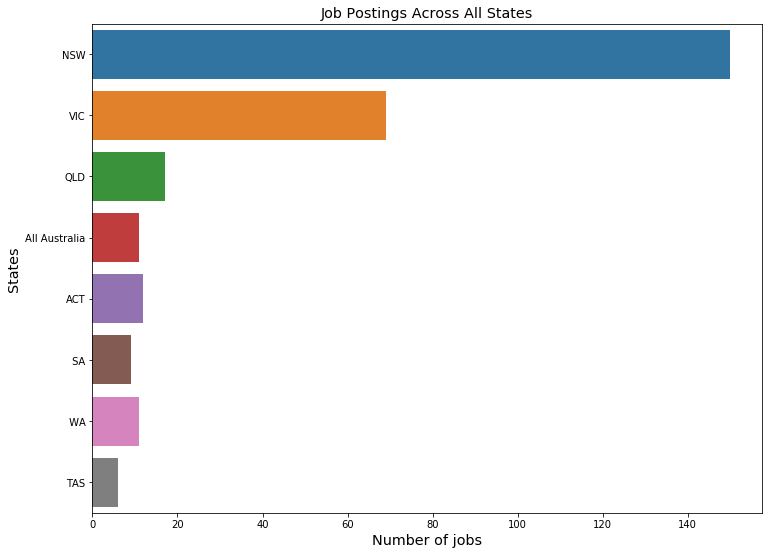

In [33]:
# As we have the clean dataset now let us see some insights of the data 
# highest number of jobs are in Sydney next to it is Melbourne 
import seaborn as sns
plt.figure(figsize=(12,9))
sns.countplot(y='State',data=jobs_indeed_df1)
plt.xlabel("Number of jobs",{
      'fontsize'            : 'x-large',
      'verticalalignment'   : 'top',
      'horizontalalignment' : 'center'
      })
plt.ylabel('States',fontsize= 'x-large')
plt.title("Job Postings Across All States",fontsize = 'x-large')
plt.show()


In [34]:
#Lets add another column based on salary which are full time and contract,
# i.e if salary has a day or an hourly package let us make into contract and if package is yearly let us make full time 
Jobtype=[]
jobtype=[]
for slry in jobs_indeed_df1.Salary:
    if 'a year' in slry:
        Jobtype.append('Full Time')
        jobtype.append(1)
    else:
        Jobtype.append('Contract')
        jobtype.append(0)
jobs_indeed_df1['Jobtype'] = Jobtype
jobs_indeed_df1['jobtype'] = jobtype
jobs_indeed_df1

,Company,Title,Description,Location,Salary,State,City,Jobtype,jobtype
0,ignite,Reporting Analyst -Parramatta-12 month Contract,Experience with Data / Process Analysis. I am ...,Sydney NSW,$50 - $55 an hour,NSW,Sydney,Contract,0
1,Ignite,Business Analyst,Junior-Mid level Business Analyst. If you are ...,Sydney NSW,$600 - $700 a day,NSW,Sydney,Contract,0
2,University of New South Wales,Data Analyst,The Data Analyst will coordinate the statistic...,Kensington NSW,"$82,417 - $87,919 a year",NSW,Kensington,Full Time,1
3,Alpha People,Database Analyst,Source to target mapping and data analysis. Ha...,Melbourne VIC,"$60,000 - $70,000 a year",VIC,Melbourne,Full Time,1
4,Department of Health and Human Services,Data Analyst,"Reporting to the Systems Manager, as Data Anal...",Melbourne VIC,"$79,955 - $90,716 a year",VIC,Melbourne,Full Time,1
5,Brisbane City Council,DATA ANALYST,As a Data Analyst in the Future Fleet team you...,Brisbane QLD,"$72,214 - $82,438 a year",QLD,Brisbane,Full Time,1
6,Robert Half Australia,Salesforce Business Analyst | Platform Owner,Salesforce data migration and integration expe...,Sydney NSW,"$120,000 a year",NSW,Sydney,Full Time,1
7,Manpower Services (Hong Kong) Limited,Data Analyst,"Data reports production. Our client, is seekin...",Australia,"$11,000 - $13,000 a month",All Australia,Austra,Contract,0
8,Ignite,Data Analyst,Ability to gather and interpret relevant data ...,Canberra ACT,"$80,000 - $90,000 a year",ACT,Canberra,Full Time,1
9,ignite,Business Systems Analyst,BA needed to identify current Data storage pro...,Sydney NSW,$700 - $770 a day,NSW,Sydney,Contract,0


In [35]:
# check the value counts of fulltime and contract

jobs_indeed_df1.Jobtype.value_counts()

Full Time    222
Contract      63
Name: Jobtype, dtype: int64

In [36]:
# as we can see Salary column is not fixed type of value it has range , per hour,per day , monthly,Per anum etc ..
# for our easyness lets make it a float type with some particular value.

# we will convert all the pay rates into per Anum.
# 1 year = 1920 working hours 
# 1 year = 52 weeks 
# 1 year = 240 working days.

xst = []
# access the salary values removing the commas
for salaries in jobs_indeed_df1.Salary:
    xst.append(salaries.replace(',',''))
jobs_indeed_df1['s'] = xst
jobs_indeed_df1

,Company,Title,Description,Location,Salary,State,City,Jobtype,jobtype,s
0,ignite,Reporting Analyst -Parramatta-12 month Contract,Experience with Data / Process Analysis. I am ...,Sydney NSW,$50 - $55 an hour,NSW,Sydney,Contract,0,$50 - $55 an hour
1,Ignite,Business Analyst,Junior-Mid level Business Analyst. If you are ...,Sydney NSW,$600 - $700 a day,NSW,Sydney,Contract,0,$600 - $700 a day
2,University of New South Wales,Data Analyst,The Data Analyst will coordinate the statistic...,Kensington NSW,"$82,417 - $87,919 a year",NSW,Kensington,Full Time,1,$82417 - $87919 a year
3,Alpha People,Database Analyst,Source to target mapping and data analysis. Ha...,Melbourne VIC,"$60,000 - $70,000 a year",VIC,Melbourne,Full Time,1,$60000 - $70000 a year
4,Department of Health and Human Services,Data Analyst,"Reporting to the Systems Manager, as Data Anal...",Melbourne VIC,"$79,955 - $90,716 a year",VIC,Melbourne,Full Time,1,$79955 - $90716 a year
5,Brisbane City Council,DATA ANALYST,As a Data Analyst in the Future Fleet team you...,Brisbane QLD,"$72,214 - $82,438 a year",QLD,Brisbane,Full Time,1,$72214 - $82438 a year
6,Robert Half Australia,Salesforce Business Analyst | Platform Owner,Salesforce data migration and integration expe...,Sydney NSW,"$120,000 a year",NSW,Sydney,Full Time,1,$120000 a year
7,Manpower Services (Hong Kong) Limited,Data Analyst,"Data reports production. Our client, is seekin...",Australia,"$11,000 - $13,000 a month",All Australia,Austra,Contract,0,$11000 - $13000 a month
8,Ignite,Data Analyst,Ability to gather and interpret relevant data ...,Canberra ACT,"$80,000 - $90,000 a year",ACT,Canberra,Full Time,1,$80000 - $90000 a year
9,ignite,Business Systems Analyst,BA needed to identify current Data storage pro...,Sydney NSW,$700 - $770 a day,NSW,Sydney,Contract,0,$700 - $770 a day


In [37]:
jobs_indeed_df1.drop('Salary',inplace=True,axis=1)
jobs_indeed_df1.rename(columns={'s':'Salary'},inplace=True)

In [38]:

jobs_indeed_df1.reset_index(drop=True,inplace=True)

In [39]:
jobs_indeed_df1.

SyntaxError: invalid syntax (<ipython-input-39-e16b34ce7ad8>, line 1)

In [40]:
# We will make some sense of Salary column by converting the Day , Hourly and weekly salary into 
# yearly package.

sal_ag=[]
count =0 
for salaries in jobs_indeed_df1.Salary:
    print salaries
    if len(salaries) == 24:
        sal_ag.append((float(salaries[1:-17]) + float(salaries[11:-7]))/2)
#         print (float(salaries[1:-17]) + float(salaries[11:-7]))/2
    elif len(salaries)== 23 :
        sal_ag.append((float(salaries[1:-17])+float(salaries[10:-7]))/2)
#         print (float(salaries[1:-17])+float(salaries[10:-7]))/2
    elif len(salaries)==22:
        sal_ag.append((float(salaries[1:-16]) + float(salaries[10:-7]))/2)
#         print (float(salaries[1:-16]) + float(salaries[10:-7]))/2
    elif len(salaries) == 18 and 'an hour' in salaries:
        sal_ag.append(((float(salaries[1:3]) + float(salaries[7:-8]))/2)*1920)
#         print salaries +'((((((((())))))))'
#         print ((float(salaries[1:3]) + float(salaries[7:-8]))/2)*1920
    elif len(salaries) == 18 and 'a day' in salaries:
        sal_ag.append(((float(salaries[1:4])+float(salaries[8:-6]))/2)*240)
#         print ((float(salaries[1:4])+float(salaries[8:-6]))/2)*240
#         print salaries +')))))))))))))'
    elif len(salaries)==17 and 'an hour' in salaries:
        sal_ag.append(((float(salaries[1:3]) + float(salaries[7:-8]))/2)*1920)
#         print ((float(salaries[1:3]) + float(salaries[7:-8]))/2)*1920
    elif len(salaries)==17 and 'a day' in salaries:
        sal_ag.append((((float(salaries[1:4]) + float(salaries[8:-6]))/2)*240))
#         print (((float(salaries[1:4]) + float(salaries[8:-6]))/2)*240)
    elif len(salaries) == 14:
        sal_ag.append(float(salaries[1:-7]))
#         print salaries+ '++++++++++'
#         print float(salaries[1:-7])
    elif len(salaries) == 13:
        sal_ag.append(float(salaries[1:-7]))
#         print float(salaries[1:-7])
    elif len(salaries) == 11 and 'a week' in salaries:
        sal_ag.append(float(salaries[1:-7])*52)
#         print salaries+'-- - - - - -  -'
#         print float(salaries[1:-7])*52
    elif len(salaries) == 11 and 'an hour' in salaries:
        sal_ag.append(float(salaries[1:-8])*1920)
#         print salaries + '^^^^'
#         print float(salaries[1:-8])*1920
    elif len(salaries) == 10:
        sal_ag.append(float(salaries[1:-6])*240)
#         print salaries + '{{{{{{}}}}}}'
#         print float(salaries[1:-6])*240
    elif len(salaries) == 9:
        sal_ag.append(float(salaries[1:3])*260)
#         print salaries+'@@@@@'
#         print float(salaries[1:3])*260


$50 - $55 an hour
$600 - $700 a day
$82417 - $87919 a year
$60000 - $70000 a year
$79955 - $90716 a year
$72214 - $82438 a year
$120000 a year
$11000 - $13000 a month
$80000 - $90000 a year
$700 - $770 a day
$125000 - $135000 a year
$74952 - $80130 a year
$92471 - $102358 a year
$450 - $550 a day
$200000 - $250000 a year
$80000 - $95000 a year
$91000 - $99000 a year
$50000 - $69000 a year
$64583 - $78418 a year
$90000 a year
$84532 - $91847 a year
$81369 - $89781 a year
$110000 a year
$100000 a year
$92470 - $102359 a year
$65000 - $75000 a year
$79955 - $90716 a year
$70868 a year
$92253 - $111619 a year
$500 - $600 a day
$108349 - $115695 a year
$32 an hour
$80000 - $85000 a year
$30000 a month
$90000 a year
$90000 - $100000 a year
$150000 - $250000 a year
$101000 - $116000 a year
$69148 - $93830 a year
$91000 - $99000 a year
$200000 - $400000 a year
$110000 a year
$100000 a year
$85907 a year
$80000 - $130000 a year
$60000 - $80000 a year
$100000 - $180000 a year
$95000 - $103000 a 

In [41]:
jobs_indeed_df1['Pay'] = sal_ag
jobs_indeed_df1.drop('Salary',axis=1,inplace=True)
jobs_indeed_df1.rename(columns={'Pay':'Salary'},inplace=True)
jobs_indeed_df1.Salary.value_counts()

90000.0     14
100000.0    12
120000.0    11
99000.0      9
85000.0      7
125000.0     7
115000.0     7
65000.0      7
150000.0     6
70000.0      5
130000.0     5
105000.0     5
144000.0     5
118500.0     5
55000.0      5
95000.0      5
140000.0     5
110000.0     4
180000.0     4
87500.0      3
168000.0     3
170000.0     3
86400.0      3
67500.0      3
80000.0      3
82500.0      3
75000.0      3
57500.0      3
192000.0     3
96000.0      2
            ..
102000.0     1
100779.0     1
72000.0      1
69222.5      1
12000.0      1
113000.0     1
112022.0     1
109527.0     1
216000.0     1
26000.0      1
176400.0     1
99738.0      1
102334.5     1
74400.0      1
89512.0      1
157500.0     1
81600.0      1
175000.0     1
103680.0     1
160000.0     1
119040.0     1
132291.0     1
99500.0      1
61000.0      1
103000.0     1
102500.0     1
42000.0      1
77541.0      1
94696.0      1
139200.0     1
Name: Salary, Length: 139, dtype: int64

In [42]:
# minimum salary in the dataset.
jobs_indeed_df1.replace(30.01 , 56719,inplace=True)
jobs_indeed_df1[jobs_indeed_df1.Salary == jobs_indeed_df1.Salary.min()]

,Company,Title,Description,Location,State,City,Jobtype,jobtype,Salary
7,Manpower Services (Hong Kong) Limited,Data Analyst,"Data reports production. Our client, is seekin...",Australia,All Australia,Austra,Contract,0,12000.0


In [43]:
# maxilum salary of the data set.
jobs_indeed_df1[jobs_indeed_df1.Salary == jobs_indeed_df1.Salary.max()]

,Company,Title,Description,Location,State,City,Jobtype,jobtype,Salary
40,Big Wednesday Digital,Head Of Data,At least 5-10 years working as a statistician ...,Australia,All Australia,Austra,Full Time,1,300000.0


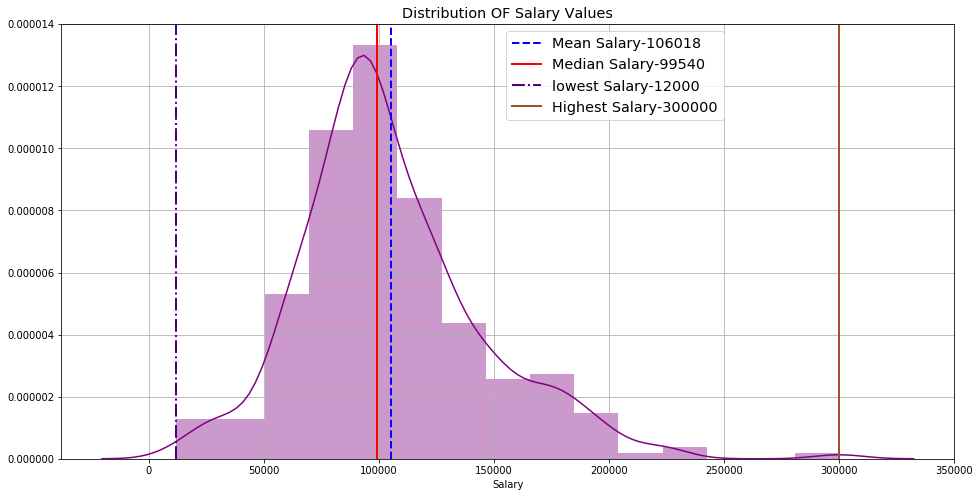

In [44]:
# as we have the cleaned the Salry column let us plot it 
# here we cn see the distribution of salary values are skewed to right
plt.figure(figsize=(16,8))
plt.title("Distribution OF Salary Values",fontsize = 'x-large',fontstyle='normal')
ax = sns.distplot(jobs_indeed_df.Salary,bins=15,color='purple',)
ax.grid(b=True, which='major')
plt.axvline(jobs_indeed_df1.Salary.mean(), color='blue', linestyle='dashed', linewidth=2,label='Mean Salary-106018')
plt.axvline(jobs_indeed_df1.Salary.median(), color='red', linestyle='solid', linewidth=2,label='Median Salary-99540')
plt.axvline(jobs_indeed_df1.Salary.min(), color='indigo', linestyle='dashdot', linewidth=2,label='lowest Salary-12000')
plt.axvline(jobs_indeed_df1.Salary.max(), color='sienna', linestyle='solid', linewidth=2,label='Highest Salary-300000')
plt.legend(loc='upper right', bbox_to_anchor=(0.75, 1),fontsize='x-large')
plt.show()

In [45]:
# Now we have data which is all cleaned and lets start digging into the questions to be answered 
# as our data has 8 columns in which are three are locations and one is Our Target variable Salary
# let us make some more columns based on Title, Salary columns 
# Salary can be classified into two types High and Low Salaries  based on the Average value of the salary column.
# High salaries are ones which are greater than the average value and low ones are the values which are under the 
# average value.

jobs_indeed_df1['Payscale'] = [1 if i > jobs_indeed_df1.Salary.median() else 0 for i in jobs_indeed_df1.Salary]

# jobs for particular states

jobs_NSW = jobs_indeed_df1[jobs_indeed_df1.State == 'NSW'].Title
# we have 173 values for NSW state

jobs_VIC = jobs_indeed_df1[jobs_indeed_df1.State == 'VIC']
# we have 69 values for the VIC state 

jobs_SA = jobs_indeed_df1[jobs_indeed_df1.State == ' SA']
# we have 10 values for the SA state

jobs_QLD = jobs_indeed_df1[jobs_indeed_df1.State == 'QLD']
# we have 23 values for the QLD state

jobs_ACT = jobs_indeed_df1[jobs_indeed_df1.State == 'ACT']
# we have 12 values for the ACT state

jobs_WA = jobs_indeed_df1[jobs_indeed_df1.State == ' WA']
# we have 11 values for the WA state

jobs_Allaus = jobs_indeed_df1[jobs_indeed_df1.State == 'All Australia']
# we have 14 values for the locations across all australia

jobs_TAS = jobs_indeed_df1[jobs_indeed_df1.State == 'TAS']
# we have 6 values for the TAS state

In [46]:
jobs_indeed_df1.Title.value_counts()

Business Analyst                                                   12
Data Analyst                                                        6
Software Engineer                                                   5
Data Scientist                                                      5
Senior Software Engineer                                            4
Big Data Engineer                                                   3
Senior Data Scientist                                               3
Data Engineer - AWS                                                 3
System Analyst                                                      3
Data Scientist | Junior to Mid Level                                2
Research Analyst                                                    2
Senior Research Analyst - Industrials (Mid/Small Caps)              2
DATA SCIENTIST                                                      2
Quantitative Analyst                                                2
Procurement Analyst 

In [47]:
# As the variables are all strings, Doing some feature engineering can help us building some good models.
# from the available variables Title,City,State are some of the important and major feature in predicting the salary.
# we will re-categorize the titile values
# we have 247 unique values in the titles. let us see if we can generalise them into 6 or 7 types of titles
a =[]
for title in jobs_indeed_df.Title:
#     print title
    if 'lead' in title.lower(): # 7 
        a.append('Lead')
    elif'senior' in title.lower(): # 40 
        a.append('Senior')
    elif 'mid' in title.lower() or 'junior' in title.lower(): # 6 #4 both # 10
        a.append('Mid/Junior')
    elif 'data' in title.lower() and 'scientist' in title.lower(): #12
        a.append('Data Scientist')
    elif 'data' in title.lower() and 'analyst' in title.lower(): #33
        a.append('Data Analyst')
    elif 'develop' in title.lower():     #6
        a.append('Mid/Junior')
    elif 'engineer' in title.lower():    #39
        a.append('Engineer')
    elif 'business' in title.lower() and 'analyst'in title.lower(): #36
        a.append('Business Analyst')  
    elif 'report' in title.lower() and 'analyst'in title.lower(): #10
        a.append('Generic')
    elif 'analyst' in title.lower(): #55
        a.append('Analyst')
    else:                       #37
        a.append('Generic') 
jobs_indeed_df1['Roles'] = a

In [48]:
# lets sort out City variable 
sity = []
for city in jobs_indeed_df1.Location:
    if 'australia' in city.lower(): 
        sity.append('All Australia')
    elif 'sydney' in city.lower():  
        sity.append('Sydney')
    elif 'NSW' in city: 
        sity.append('NSW')
    elif 'melbourne' in city.lower():
        sity.append('Melbourne')
    elif 'VIC' in city: 
        sity.append('VIC')
    elif 'victoria' in city.lower():      
        sity.append('VIC')
    elif 'brisbane' in city.lower():
        sity.append('Brisbane')
    elif 'QLD' in city: # 
        sity.append('Brisbane')
    elif 'queensland' in city.lower():
        sity.append('Brisbane')
    elif 'adelaide' in city.lower():       
        sity.append('Adelaide')
    elif 'perth' in city.lower():      
        sity.append('Perth')
    elif 'WA' in city:     
        sity.append('Perth')
    elif 'canberra' in city.lower():   
        sity.append('Canberra')
    elif 'hobart' in city.lower():   
        sity.append('Hobart')
    elif 'TAS' or city : # 1 in other tas +1 tasmania
        sity.append('Hobart')
        
jobs_indeed_df1['CITY'] = sity

In [49]:
cols = ['Title','Company','Roles','Description','State','City','CITY','Location','Jobtype','Salary','Payscale','jobtype']
jobs_indeed_df1=jobs_indeed_df1[cols]

In [50]:
# let us see if we can pick up some thing useful from our description column and use it as input variable.
# let us pick up some skills listed in the description column and make a new column as skills required,
# for the respective column.manually it is an Hectic task to go throuh each and every value in description
# and check the key skills in the jobs advertised. so, lets pick up some generic skills and search the Values in 
# description rows and if one or more of the skills required we will mark it as 1 . if none of them are present we will
# mark it 0. 

skil_req_list = ['Analyst','Data Engineer','Data Warehousing','AWS','ETL','SQl','Database','data mapping','Big Data','developing',
                 'Data Modelling','Engineer','Data',
                 'modelling','client','Python','Stakeholder','report','AI','communication','BI',
                'SAS','programming','models','research','software','API','design','Development','Retail','Banking',
                'Azure','Intelligence','Server','Reporting','solution','developer','scientist',]
skil=[]
skill=[]
for des in jobs_indeed_df1.Description:
    print des
    skill.append(skil)
    skil = []
    for skl in skil_req_list:
        print skl
        if skl.upper() in des.upper():
            skil.append(skl)
            print skil
        else:
            continue
print skill ,"\n\n"
skill.append(['Data Modelling', 'Data', 'modelling', 'solution'])
skill.pop(0)
print skill


Experience with Data / Process Analysis. I am looking for a Reporting Analayst to join a Large Telco Organisation in Parramatta on a 12 month + daily rate...
Analyst
Data Engineer
Data Warehousing
AWS
ETL
SQl
Database
data mapping
Big Data
developing
Data Modelling
Engineer
Data
['Data']
modelling
client
Python
Stakeholder
report
['Data', 'report']
AI
['Data', 'report', 'AI']
communication
BI
SAS
programming
models
research
software
API
design
Development
Retail
Banking
Azure
Intelligence
Server
Reporting
['Data', 'report', 'AI', 'Reporting']
solution
developer
scientist
Junior-Mid level Business Analyst. If you are a junior to mid-level Business Analyst, please APPLY NOW. This role would be ideal for Business Analysts with 2-5...
Analyst
['Analyst']
Data Engineer
Data Warehousing
AWS
ETL
SQl
Database
data mapping
Big Data
developing
Data Modelling
Engineer
Data
modelling
client
Python
Stakeholder
report
AI
communication
BI
SAS
programming
models
research
software
API
design
Developmen

scientist
Air Intelligence Analyst (AIA) - Geospatial Intelligence (GEOINT) personnel are employed to support Air Force aerial reconnaissance and strike capability and...
Analyst
['Analyst']
Data Engineer
Data Warehousing
AWS
ETL
SQl
Database
data mapping
Big Data
developing
Data Modelling
Engineer
Data
modelling
client
Python
Stakeholder
report
AI
['Analyst', 'AI']
communication
BI
['Analyst', 'AI', 'BI']
SAS
programming
models
research
software
API
design
Development
Retail
Banking
Azure
Intelligence
['Analyst', 'AI', 'BI', 'Intelligence']
Server
Reporting
solution
developer
scientist
Senior Policy & Data Analyst. Data analysis and translating data results into insights. The purpose of this Senior Policy and Data Analyst role is to undertake...
Analyst
['Analyst']
Data Engineer
Data Warehousing
AWS
ETL
SQl
Database
data mapping
Big Data
developing
Data Modelling
Engineer
Data
['Analyst', 'Data']
modelling
client
Python
Stakeholder
report
AI
communication
BI
SAS
programming
models
res

developer
scientist
Analyse tender opportunities and convert raw data into logical business requirements. Maintenance of Pricing database and provide detailed analysis of the rates...
Analyst
Data Engineer
Data Warehousing
AWS
ETL
SQl
Database
['Database']
data mapping
Big Data
developing
Data Modelling
Engineer
Data
['Database', 'Data']
modelling
client
Python
Stakeholder
report
AI
['Database', 'Data', 'AI']
communication
BI
SAS
programming
models
research
software
API
design
Development
Retail
Banking
Azure
Intelligence
Server
Reporting
solution
developer
scientist
Analyse sales data and report on Key Performance Indicators by stores and regions. With this in mind team are looking to add an experienced Business Analyst,...
Analyst
['Analyst']
Data Engineer
Data Warehousing
AWS
ETL
SQl
Database
data mapping
Big Data
developing
Data Modelling
Engineer
Data
['Analyst', 'Data']
modelling
client
Python
Stakeholder
report
['Analyst', 'Data', 'report']
AI
communication
BI
SAS
programming
mo

Azure
Intelligence
Server
Reporting
solution
['Data', 'solution']
developer
scientist
Are you an Analyst with 2- 3 years experience? This constantly growing and evolving business works within the data / digital / research space and boasts some of...
Analyst
['Analyst']
Data Engineer
Data Warehousing
AWS
ETL
SQl
Database
data mapping
Big Data
developing
Data Modelling
Engineer
Data
['Analyst', 'Data']
modelling
client
Python
Stakeholder
report
AI
communication
BI
SAS
programming
models
research
['Analyst', 'Data', 'research']
software
API
design
Development
Retail
Banking
Azure
Intelligence
Server
Reporting
solution
developer
scientist
Knowledge of Data Projects and CRM Projects is desirable. Experience and knowledge of data driven marketing practices This role is a Fixed Term Contract and...
Analyst
Data Engineer
Data Warehousing
AWS
ETL
SQl
Database
data mapping
Big Data
developing
Data Modelling
Engineer
Data
['Data']
modelling
client
Python
Stakeholder
report
AI
communication
BI
SAS

BI
SAS
programming
models
research
software
API
design
Development
Retail
Banking
Azure
Intelligence
Server
Reporting
solution
developer
scientist
Senior Customer Analyst - 00005UWU. Substantial experience within data analyses and command of Excel is essential....
Analyst
['Analyst']
Data Engineer
Data Warehousing
AWS
ETL
SQl
Database
data mapping
Big Data
developing
Data Modelling
Engineer
Data
['Analyst', 'Data']
modelling
client
Python
Stakeholder
report
AI
communication
BI
SAS
programming
models
research
software
API
design
Development
Retail
Banking
Azure
Intelligence
Server
Reporting
solution
developer
scientist
The Future of Work Taskforce seeks to fill two ongoing/non-ongoing positions (a) Principal Data Analyst and (b) Data Infrastructure Manager....
Analyst
['Analyst']
Data Engineer
Data Warehousing
AWS
ETL
SQl
Database
data mapping
Big Data
developing
Data Modelling
Engineer
Data
['Analyst', 'Data']
modelling
client
Python
Stakeholder
report
AI
communication
BI
SAS
programmi

scientist
Data retrial using API's. They are looking for Data Engineer to assist the Analysts in data retrial (Flatflles, web analytics, SQL & NoSQL storage) cleansing,...
Analyst
['Analyst']
Data Engineer
['Analyst', 'Data Engineer']
Data Warehousing
AWS
ETL
SQl
['Analyst', 'Data Engineer', 'SQl']
Database
data mapping
Big Data
developing
Data Modelling
Engineer
['Analyst', 'Data Engineer', 'SQl', 'Engineer']
Data
['Analyst', 'Data Engineer', 'SQl', 'Engineer', 'Data']
modelling
client
Python
Stakeholder
report
AI
communication
BI
SAS
programming
models
research
software
API
['Analyst', 'Data Engineer', 'SQl', 'Engineer', 'Data', 'API']
design
Development
Retail
Banking
Azure
Intelligence
Server
Reporting
solution
developer
scientist
Effectively analyse sales and marketing data. Ability to interpret large amounts of data and to multi-task. An exciting opportunity has become available for a...
Analyst
Data Engineer
Data Warehousing
AWS
ETL
SQl
Database
data mapping
Big Data
developing


models
research
software
API
design
['Analyst', 'client', 'design']
Development
Retail
Banking
Azure
Intelligence
Server
Reporting
solution
developer
scientist
A chance to join a truly passionate, young and dynamic team of mathematicians, statisticians, data scientists and product analysts tasked with working across...
Analyst
['Analyst']
Data Engineer
Data Warehousing
AWS
ETL
SQl
Database
data mapping
Big Data
developing
Data Modelling
Engineer
Data
['Analyst', 'Data']
modelling
client
Python
Stakeholder
report
AI
communication
BI
SAS
programming
models
research
software
API
design
Development
Retail
Banking
Azure
Intelligence
Server
Reporting
solution
developer
scientist
['Analyst', 'Data', 'scientist']
Undertake data analysis, using qualitative and quantitative methodologies. Continually research and review new and existing data sources, and communicate any...
Analyst
Data Engineer
Data Warehousing
AWS
ETL
SQl
Database
data mapping
Big Data
developing
Data Modelling
Engineer
Data
['

Server
Reporting
solution
developer
scientist
To be successful in this role you will have a minimum 3 years solid experience as a senior business analyst ....
Analyst
['Analyst']
Data Engineer
Data Warehousing
AWS
ETL
SQl
Database
data mapping
Big Data
developing
Data Modelling
Engineer
Data
modelling
client
Python
Stakeholder
report
AI
communication
BI
SAS
programming
models
research
software
API
design
Development
Retail
Banking
Azure
Intelligence
Server
Reporting
solution
developer
scientist
Strong analytical skills as well as the ability to interpret data and report on key trends. You will be supported by a team of high-performing and experienced...
Analyst
Data Engineer
Data Warehousing
AWS
ETL
SQl
Database
data mapping
Big Data
developing
Data Modelling
Engineer
Data
['Data']
modelling
client
Python
Stakeholder
report
['Data', 'report']
AI
communication
BI
['Data', 'report', 'BI']
SAS
programming
models
research
software
API
design
Development
Retail
Banking
Azure
Intelligence
Se

Retail
Banking
Azure
Intelligence
Server
Reporting
solution
developer
scientist
Vero is predominantly a team of hardworking, talented engineers and we're looking for another Senior Full Stack Engineer to join our talented team....
Analyst
Data Engineer
Data Warehousing
AWS
ETL
SQl
Database
data mapping
Big Data
developing
Data Modelling
Engineer
['Engineer']
Data
modelling
client
Python
Stakeholder
report
AI
communication
BI
SAS
programming
models
research
software
API
design
Development
Retail
Banking
Azure
Intelligence
Server
Reporting
solution
developer
scientist
Big Data engineer:. As a data engineer, you should be familiar with and have hands-on experience with all aspects of big data engineering from data ingestion of...
Analyst
Data Engineer
['Data Engineer']
Data Warehousing
AWS
ETL
SQl
Database
data mapping
Big Data
['Data Engineer', 'Big Data']
developing
Data Modelling
Engineer
['Data Engineer', 'Big Data', 'Engineer']
Data
['Data Engineer', 'Big Data', 'Engineer', 'Data']
m

Intelligence
Server
Reporting
solution
developer
scientist
Proven ability to critically review and analyse industry data. You will be working for one of Australia's leading sell side equities houses, focussing on...
Analyst
Data Engineer
Data Warehousing
AWS
ETL
SQl
Database
data mapping
Big Data
developing
Data Modelling
Engineer
Data
['Data']
modelling
client
Python
Stakeholder
report
AI
communication
BI
['Data', 'BI']
SAS
programming
models
research
software
API
design
Development
Retail
Banking
Azure
Intelligence
Server
Reporting
solution
developer
scientist
The ADAIT Platform aims to break the fragmented data view of the urban transport system, and establish an integrated data management and analytic capability....
Analyst
Data Engineer
Data Warehousing
AWS
ETL
SQl
Database
data mapping
Big Data
developing
Data Modelling
Engineer
Data
['Data']
modelling
client
Python
Stakeholder
report
AI
['Data', 'AI']
communication
BI
['Data', 'AI', 'BI']
SAS
programming
models
research
software

Big Data
developing
Data Modelling
Engineer
['Engineer']
Data
modelling
client
Python
Stakeholder
report
AI
communication
BI
SAS
programming
models
research
software
API
design
Development
Retail
Banking
Azure
Intelligence
Server
Reporting
solution
developer
scientist
Data retrial using API's. Experiencing with cloud based data storage - Azure, Google, AWS. Our client runs one of the largest loyalty datasets in Australia -...
Analyst
Data Engineer
Data Warehousing
AWS
['AWS']
ETL
SQl
Database
data mapping
Big Data
developing
Data Modelling
Engineer
Data
['AWS', 'Data']
modelling
client
['AWS', 'Data', 'client']
Python
Stakeholder
report
AI
communication
BI
SAS
programming
models
research
software
API
['AWS', 'Data', 'client', 'API']
design
Development
Retail
Banking
Azure
['AWS', 'Data', 'client', 'API', 'Azure']
Intelligence
Server
Reporting
solution
developer
scientist
You'll work closely with the business and data scientists to produce meaningful analytical insights. A strong backgr

Python
Stakeholder
report
AI
communication
BI
SAS
programming
models
research
software
API
design
Development
Retail
Banking
Azure
Intelligence
Server
Reporting
solution
developer
scientist
Work along side Software Engineers, Data Analysts, Data Scientists and Product Specialists from all different backgrounds....
Analyst
['Analyst']
Data Engineer
Data Warehousing
AWS
ETL
SQl
Database
data mapping
Big Data
developing
Data Modelling
Engineer
['Analyst', 'Engineer']
Data
['Analyst', 'Engineer', 'Data']
modelling
client
Python
Stakeholder
report
AI
communication
BI
SAS
programming
models
research
software
['Analyst', 'Engineer', 'Data', 'software']
API
design
Development
Retail
Banking
Azure
Intelligence
Server
Reporting
solution
developer
scientist
['Analyst', 'Engineer', 'Data', 'software', 'scientist']
Applicants should also demonstrate Post-tertiary experience in scientific computing and systems, preferably with a focus on biophysical remote sensing, image...
Analyst
Data Engineer
Dat

In [51]:
# Create the Dataframe for the skills column 
df = pd.DataFrame(skill,columns=['a','b','c','d','e','f','g'])

In [52]:
# converting from unicode to strings
df['A']=df.a.apply(str)
df['B']=df.b.apply(str)
df['C']=df.c.apply(str)
df['D']=df.d.apply(str)
df['E']=df.e.apply(str)
df['F']=df.f.apply(str)
df['G']=df.g.apply(str)

df.drop(['a','b','c','d','e','f','g'],inplace=True,axis=1)
df.head()

,A,B,C,D,E,F,G
0,Data,report,AI,Reporting,None,None,None
1,Analyst,None,None,None,None,None,None
2,Analyst,Data,report,design,Reporting,None,None
3,Data,None,None,None,None,None,None
4,Analyst,Data,report,Reporting,None,None,None


In [53]:
# As we have None values replace them with NaNs to make our life easy
df.replace('None', np.nan, inplace=True)    
df.head()

,A,B,C,D,E,F,G
0,Data,report,AI,Reporting,NaN,NaN,NaN
1,Analyst,NaN,NaN,NaN,NaN,NaN,NaN
2,Analyst,Data,report,design,Reporting,NaN,NaN
3,Data,NaN,NaN,NaN,NaN,NaN,NaN
4,Analyst,Data,report,Reporting,NaN,NaN,NaN


In [54]:
# dropping the nan vales and replacing with empty character
df['Skills'] = df[df.columns[:]].apply(lambda x: ','.join(x.dropna().astype(str).astype(str)),axis=1)
df.head()

,A,B,C,D,E,F,G,Skills
0,Data,report,AI,Reporting,NaN,NaN,NaN,"Data,report,AI,Reporting"
1,Analyst,NaN,NaN,NaN,NaN,NaN,NaN,Analyst
2,Analyst,Data,report,design,Reporting,NaN,NaN,"Analyst,Data,report,design,Reporting"
3,Data,NaN,NaN,NaN,NaN,NaN,NaN,Data
4,Analyst,Data,report,Reporting,NaN,NaN,NaN,"Analyst,Data,report,Reporting"


In [55]:
df.Skills.value_counts()

Data                                                               36
Analyst,Data                                                       20
Analyst                                                            11
Data,AI                                                             7
Analyst,Data,report,Reporting                                       6
Data,BI                                                             6
Analyst,Data,client                                                 6
Data,scientist                                                      5
Data,solution                                                       5
Data,AI,BI                                                          5
Engineer,Data                                                       4
Analyst,Data,research                                               4
Engineer                                                            4
Data,research                                                       4
research            

In [56]:
# lets make some skill count based on our required skill set
c=0
Skill_count = []
for sklcount in df.Skills:
    if sklcount is '':
        Skill_count.append(0)
    else:
        c = sklcount.count(',')
        c+=1
        Skill_count.append(c)
jobs_indeed_df1['Skill_Count'] = Skill_count
jobs_indeed_df1['Skills'] = df.Skills
jobs_indeed_df1

/Applications/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Applications/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,Title,Company,Roles,Description,State,City,CITY,Location,Jobtype,Salary,Payscale,jobtype,Skill_Count,Skills
0,Reporting Analyst -Parramatta-12 month Contract,ignite,Generic,Experience with Data / Process Analysis. I am ...,NSW,Sydney,Sydney,Sydney NSW,Contract,100800.0,1,0,4,"Data,report,AI,Reporting"
1,Business Analyst,Ignite,Business Analyst,Junior-Mid level Business Analyst. If you are ...,NSW,Sydney,Sydney,Sydney NSW,Contract,156000.0,1,0,1,Analyst
2,Data Analyst,University of New South Wales,Data Analyst,The Data Analyst will coordinate the statistic...,NSW,Kensington,NSW,Kensington NSW,Full Time,85168.0,0,1,5,"Analyst,Data,report,design,Reporting"
3,Database Analyst,Alpha People,Data Analyst,Source to target mapping and data analysis. Ha...,VIC,Melbourne,Melbourne,Melbourne VIC,Full Time,65000.0,0,1,1,Data
4,Data Analyst,Department of Health and Human Services,Data Analyst,"Reporting to the Systems Manager, as Data Anal...",VIC,Melbourne,Melbourne,Melbourne VIC,Full Time,85335.5,0,1,4,"Analyst,Data,report,Reporting"
5,DATA ANALYST,Brisbane City Council,Data Analyst,As a Data Analyst in the Future Fleet team you...,QLD,Brisbane,Brisbane,Brisbane QLD,Full Time,77326.0,0,1,2,"Analyst,Data"
6,Salesforce Business Analyst | Platform Owner,Robert Half Australia,Business Analyst,Salesforce data migration and integration expe...,NSW,Sydney,Sydney,Sydney NSW,Full Time,120000.0,1,1,3,"Analyst,Data,client"
7,Data Analyst,Manpower Services (Hong Kong) Limited,Data Analyst,"Data reports production. Our client, is seekin...",All Australia,Austra,All Australia,Australia,Contract,12000.0,0,0,3,"Data,client,report"
8,Data Analyst,Ignite,Data Analyst,Ability to gather and interpret relevant data ...,ACT,Canberra,Canberra,Canberra ACT,Full Time,85000.0,0,1,3,"Data,AI,BI"
9,Business Systems Analyst,ignite,Business Analyst,BA needed to identify current Data storage pro...,NSW,Sydney,Sydney,Sydney NSW,Contract,176400.0,1,0,2,"Data,BI"


In [57]:
jobs_indeed_df1.Payscale.value_counts()

0    144
1    141
Name: Payscale, dtype: int64

#### Now we have done every thing including EDA and Feature Engineering to build the model.Let us think as a classification problem and predict the high and low salaries.

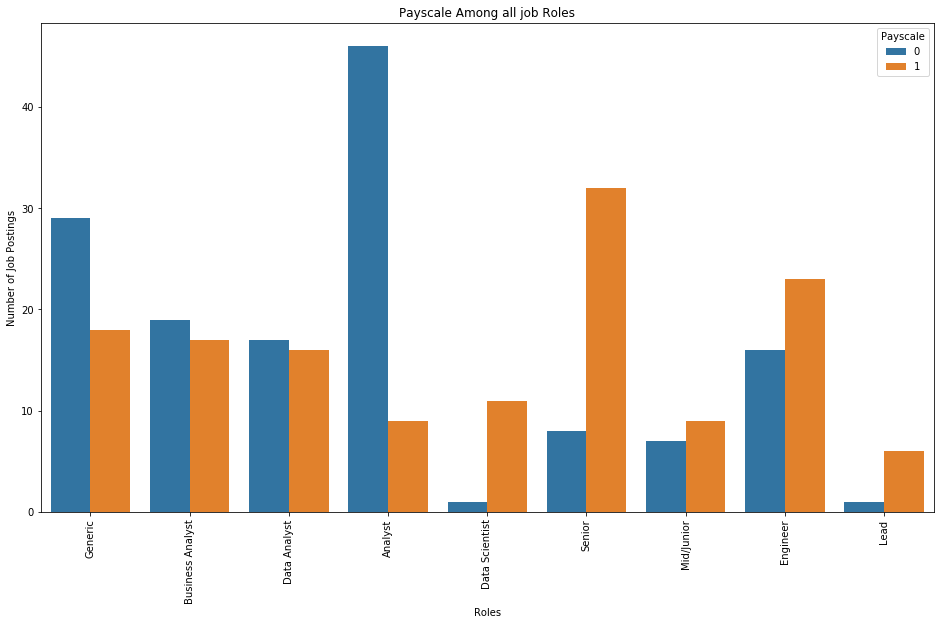

In [58]:
# lrt us see plot for high pay jobs across all the states 
plt.clf()
plt.figure(figsize=(16,9))
sns.countplot(x="Roles", hue="Payscale", data=jobs_indeed_df1)
plt.ylabel("Number of Job Postings")
plt.xlabel("Roles")
plt.title("Payscale Among all job Roles")
plt.xticks(rotation=90)
plt.show()

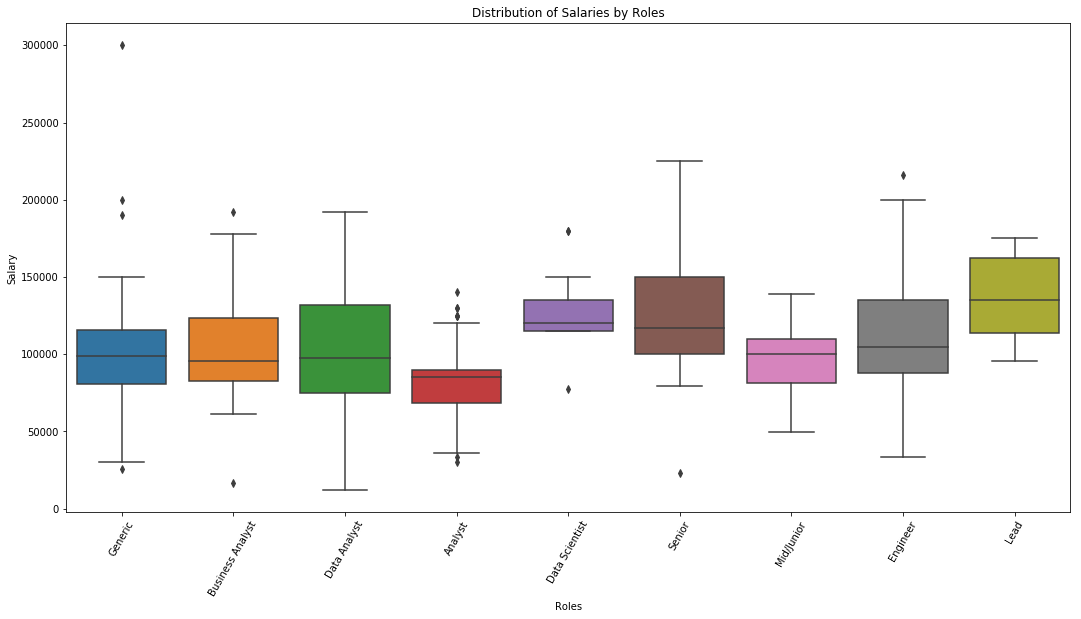

In [59]:
# outliers in the Salaries when compared with Roles

fig, ax = plt.subplots(1, 1, figsize=(18, 9))
g = sns.boxplot('Roles', 'Salary', data=jobs_indeed_df1, ax=ax)
g.set(title='Distribution of Salaries by Roles')
for item in g.get_xticklabels():
    item.set_rotation(60)
plt.show()

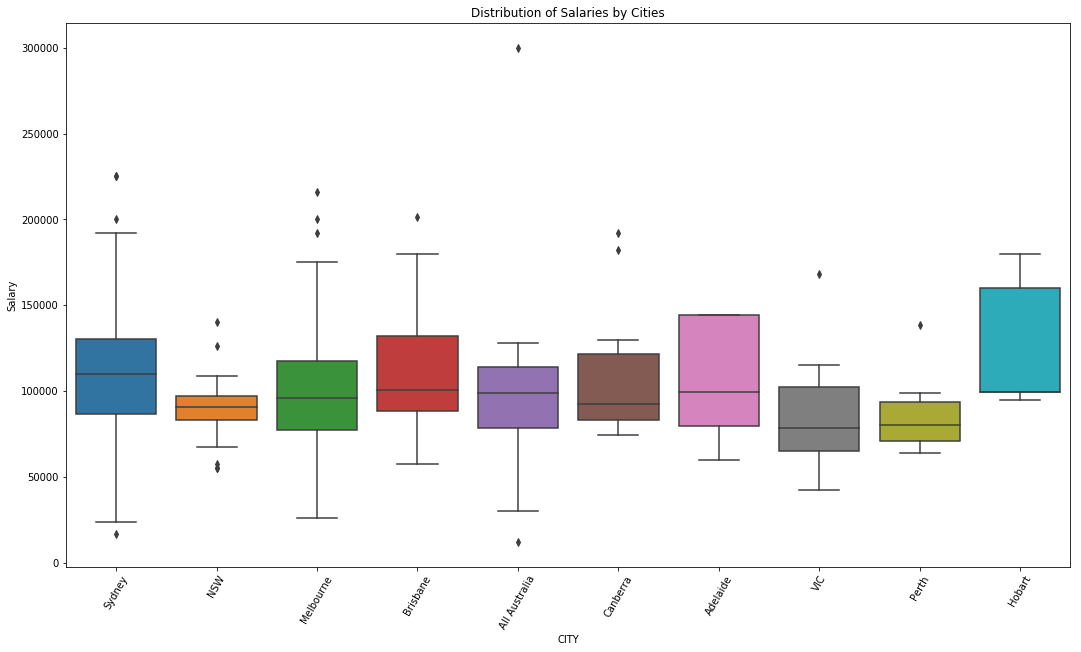

In [60]:
# Salaries outliers with the Cities column 

fig, ax = plt.subplots(1, 1, figsize=(18, 10))
g = sns.boxplot('CITY', 'Salary', data=jobs_indeed_df1, ax=ax)
g.set(title='Distribution of Salaries by Cities')
for item in g.get_xticklabels():
    item.set_rotation(60)
plt.show()

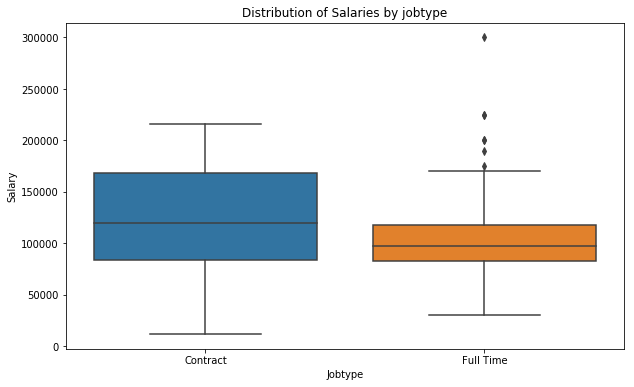

In [61]:
# Salaries outliers with jobtype column 

fig, ax = plt.subplots(1, 1, figsize=(10, 6),)
g = sns.boxplot('Jobtype', 'Salary', data=jobs_indeed_df1, ax=ax)
g.set(title='Distribution of Salaries by jobtype')
plt.show()

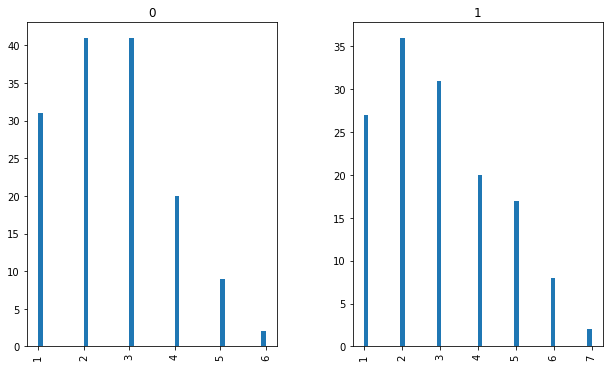

In [62]:
# distribution of the skill count by payscale
jobs_indeed_df1.hist(column='Skill_Count',by ='Payscale',bins=50,figsize = (10,6))
plt.show()


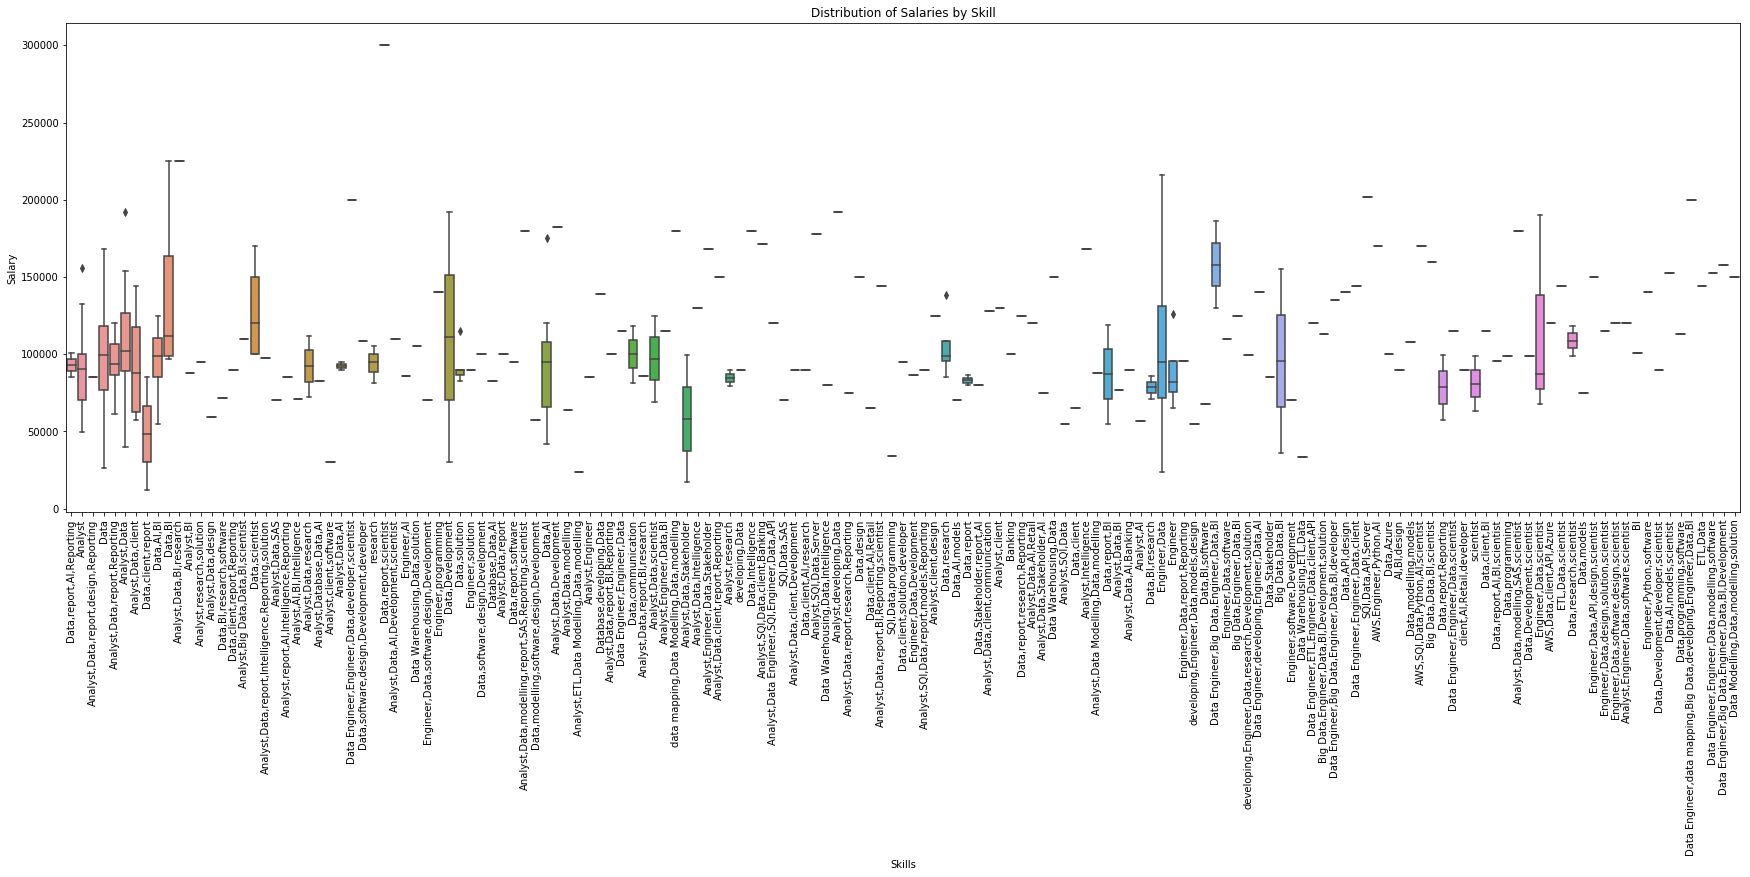

In [63]:
# salary outliers based on skills  

fig, ax = plt.subplots(1, 1, figsize=(30, 9),)
g = sns.boxplot('Skills','Salary', data=jobs_indeed_df1, ax=ax)
g.set(title='Distribution of Salaries by Skill')
for item in g.get_xticklabels():
    item.set_rotation(90)
plt.show()

In [64]:
# as we have the lot of outliers we will consider it as a classification problem. and predict high and low salaries 
# based on median value of the salary

## Build Models and compare 

In [65]:
# let us use Random Forest Classifier for our problem and predict the salary as high and low cosidering 
#city,roles,jobtype and skills 
Model_data = jobs_indeed_df1[['jobtype','Payscale']]
CITY_dummies = pd.get_dummies(jobs_indeed_df1.CITY,prefix='CITY').iloc[:,1:]
Roles_dummies = pd.get_dummies(jobs_indeed_df1.Roles,prefix='Roles').iloc[:,1:]

#let us use count vectorizer for skills column as it has string values and ranges across multiple values for each rows
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer
X = jobs_indeed_df1.Skills
cv = CountVectorizer(stop_words="english",ngram_range=(1, 1),min_df=1)
cv.fit(X)
# dataa = pd.DataFrame(cv.fit_transform(X).toarray(),columns=cv.get_feature_names())
dataa = pd.DataFrame(cv.transform(X).todense(), columns=cv.get_feature_names())

# now we have four input variables SKILLS,CITY,JOBTYPE,ROLES .. Let use them as inputs and payscale as predictor
# get a copy of above dummies and make a new dataframe with payscale column .

Model_data = [CITY_dummies,Roles_dummies,dataa,Model_data]
Model_data = pd.concat(Model_data,axis=1)

In [66]:
Model_data.shape

(285, 55)

In [67]:
Model_data1 = Model_data
Model_data1.drop_duplicates( inplace=True,)

In [68]:
Model_data1.shape

(272, 55)

## Random Forest Classifier

In [69]:
# build the RFC
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
y = Model_data1['Payscale']
X = Model_data1[[g for g in Model_data1 if g not in ['Payscale']]]
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X, y, test_size=0.20,random_state=42)
rfc = RandomForestClassifier(n_estimators=9,random_state=42,max_features=7)
rfc.fit(Xr_train, yr_train)
from sklearn.metrics import accuracy_score
rfc_pred = rfc.predict(Xr_test)
acc = accuracy_score(yr_test, rfc_pred)
print "Accuracy Score:", acc.round(3)

Accuracy Score: 0.782


In [70]:
# using decision tree 
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=None, max_features='auto')
dtc.fit(Xr_train, yr_train)
print 'dtc acc:', dtc.score(Xr_test, yr_test)

dtc acc: 0.563636363636


In [71]:
# let us check the baseline Accuracy of the data ..
baseline_acc = 1. - Model_data.Payscale.mean()
baseline_acc

# Random Forest Classifier model performing better than the base line Acuuracy.

0.5

In [72]:
# cross validation Scores

from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

scores = cross_val_score(rfc, Xr_train, yr_train, cv=6)
print "Train Cross-validated scores:\n\t", scores,"\nMean Score",scores.mean(),"\nStd Dev of Score",scores.std()

print '______________________________________________________________________\n'
scores = cross_val_score(rfc, Xr_test, yr_test, cv=6,)
print "Test Cross-validated scores:\n\t", scores,"\nMean Score",scores.mean(),"\nStd Dev of Score",scores.std()



/Applications/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Train Cross-validated scores:
	[ 0.67567568  0.5         0.69444444  0.61111111  0.75        0.66666667] 
Mean Score 0.64964964965 
Std Dev of Score 0.0784473665884
______________________________________________________________________

Test Cross-validated scores:
	[ 0.4         0.5         0.5         0.77777778  0.625       0.875     ] 
Mean Score 0.612962962963 
Std Dev of Score 0.166756662945


           Predicted High  Predicted low
True High              24              4
True Low                8             19 




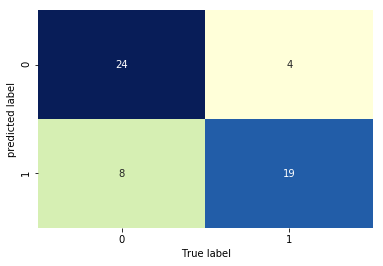

In [73]:
from sklearn.metrics import confusion_matrix

print pd.DataFrame(
    confusion_matrix(yr_test, rfc_pred),
    columns=['Predicted High', 'Predicted low'],
    index=['True High', 'True Low']
),'\n\n'

mat = confusion_matrix(yr_test,rfc_pred)
sns.heatmap(mat, annot=True, fmt='d', cbar=False,cmap="YlGnBu")
plt.xlabel('True label')
plt.ylabel('predicted label');
plt.show()

In [74]:
from sklearn.metrics import classification_report
print classification_report(yr_test, rfc_pred)


# Precision ( True Positives divided by Total Predicted Positives)
# Recall (True Positives divided by Total Actual Positives)
# f1-score ( 2 * (precision * recall) / (precision + recall) )
# Support -  Number of True Values in said class

             precision    recall  f1-score   support

          0       0.75      0.86      0.80        28
          1       0.83      0.70      0.76        27

avg / total       0.79      0.78      0.78        55



In [75]:
# list of the features and their importance scores

imp_features  = list(zip(Xr_train.columns,rfc.feature_importances_))


def getKey(item):
    return item[1]


sorted(imp_features, key=getKey)



[(u'sas', 0.0),
 (u'server', 0.0),
 (u'python', 0.00034686456816924061),
 ('CITY_Hobart', 0.00054129044145765292),
 (u'database', 0.00090774470490197602),
 (u'azure', 0.0014606191594339819),
 (u'developing', 0.0019070252137640851),
 (u'mapping', 0.0033466560389403947),
 (u'api', 0.0033503906102953637),
 (u'warehousing', 0.0036860013548628604),
 (u'programming', 0.0040788217287347512),
 (u'retail', 0.0048455761112450686),
 (u'banking', 0.0049828664202719135),
 (u'stakeholder', 0.0052055858352642228),
 (u'models', 0.0057590593653231263),
 (u'etl', 0.0068296916826686887),
 (u'aws', 0.0077821523801035646),
 ('CITY_Perth', 0.008162729499487523),
 ('Roles_Lead', 0.0088851235276129741),
 ('CITY_All Australia', 0.0090262676694572788),
 (u'big', 0.0093690952397857893),
 (u'communication', 0.010378897697080761),
 (u'reporting', 0.010566712351986949),
 (u'sql', 0.010862902034127287),
 (u'intelligence', 0.01134232082535319),
 (u'developer', 0.011431213090811857),
 ('Roles_Mid/Junior', 0.0123081449

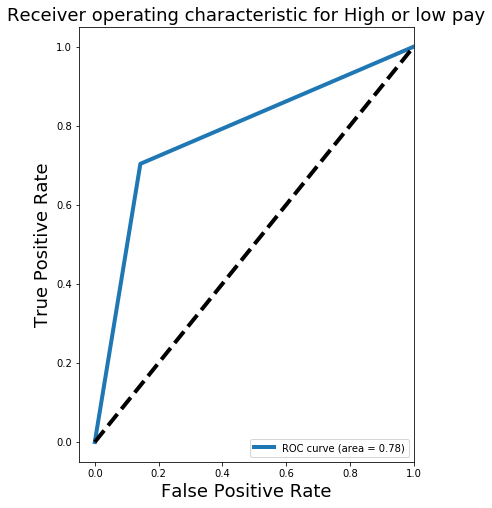

In [76]:
from sklearn.metrics import roc_curve, auc
# For class 1, find the area under the curve
fpr, tpr,_ = roc_curve(yr_test, rfc_pred)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[6,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for High or low pay', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [77]:
# Decision Tree 

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,class_names=['high','low'],rounded=True, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


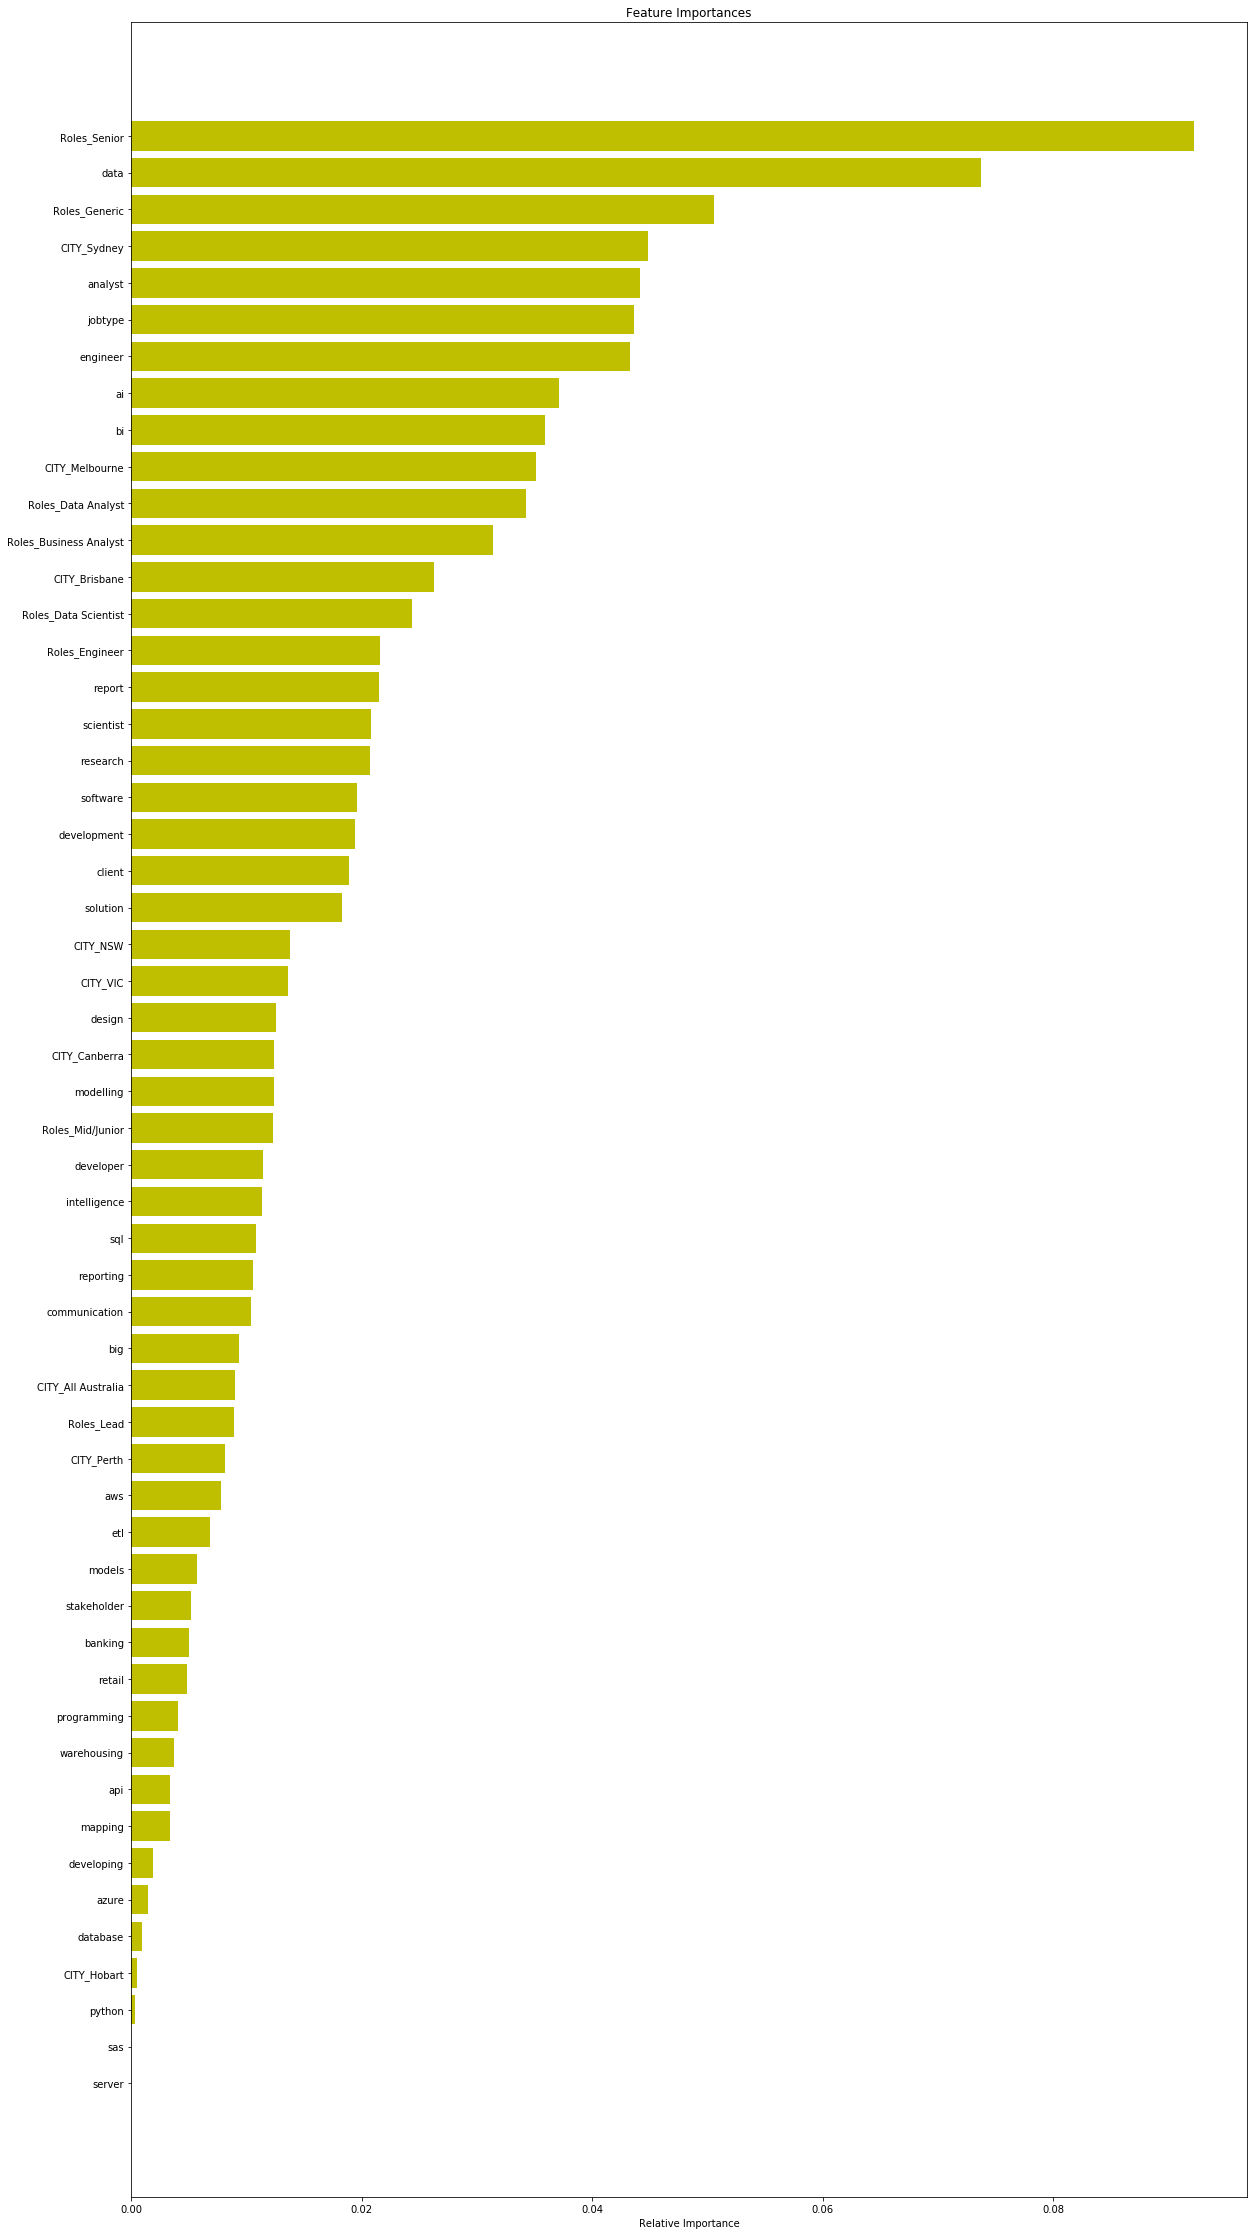

In [78]:
importances = rfc.feature_importances_
indices = np.argsort(importances)
features = Xr_train.columns
plt.figure(figsize=(20,40))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='y', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

#### From the Above result my model is just doing ok. let us see and compare it other models then we can come to a conclusion.

# KNN model

In [79]:
# Let us use KNN Model To Predict the Pay scale.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
y = Model_data['Payscale']
X = Model_data[[g for g in Model_data if g not in ['Payscale']]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=192)
    
knn = KNeighborsClassifier(n_neighbors=3,n_jobs=2)

knn.fit(X_train, y_train)

# CALUCULATE THE ACUURACY AND BASELINE 
print 'KNN Score',knn.score(X_test, y_test), 'Baseline Accuracy',1. - np.mean(y_test),'\n'

# predict test class:
y_pred = knn.predict(X_test)

# predicted test probability:
y_pp = knn.predict_proba(X_test)

print y_pp, '\n\n',y_pred

KNN Score 0.672727272727 Baseline Accuracy 0.472727272727 

[[ 0.33333333  0.66666667]
 [ 0.66666667  0.33333333]
 [ 0.          1.        ]
 [ 0.33333333  0.66666667]
 [ 0.33333333  0.66666667]
 [ 0.33333333  0.66666667]
 [ 0.66666667  0.33333333]
 [ 0.66666667  0.33333333]
 [ 0.33333333  0.66666667]
 [ 1.          0.        ]
 [ 0.66666667  0.33333333]
 [ 0.66666667  0.33333333]
 [ 1.          0.        ]
 [ 0.66666667  0.33333333]
 [ 1.          0.        ]
 [ 0.33333333  0.66666667]
 [ 0.33333333  0.66666667]
 [ 1.          0.        ]
 [ 0.          1.        ]
 [ 0.66666667  0.33333333]
 [ 0.66666667  0.33333333]
 [ 1.          0.        ]
 [ 0.33333333  0.66666667]
 [ 0.          1.        ]
 [ 0.66666667  0.33333333]
 [ 0.66666667  0.33333333]
 [ 0.66666667  0.33333333]
 [ 0.66666667  0.33333333]
 [ 0.66666667  0.33333333]
 [ 1.          0.        ]
 [ 0.66666667  0.33333333]
 [ 0.33333333  0.66666667]
 [ 0.33333333  0.66666667]
 [ 0.          1.        ]
 [ 1.          0.     

In [80]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted High', 'Predicted low'],
    index=['True High', 'True Low']
)

,Predicted High,Predicted low
True High,20,6
True Low,12,17


             precision    recall  f1-score   support

          0       0.62      0.77      0.69        26
          1       0.74      0.59      0.65        29

avg / total       0.69      0.67      0.67        55



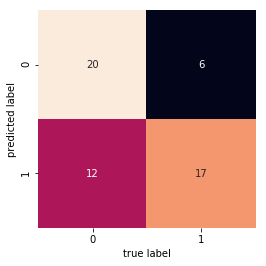

In [81]:
from sklearn.metrics import classification_report
print classification_report(y_test, y_pred)


# Precision ( True Positives divided by Total Predicted Positives)
# Recall (True Positives divided by Total Actual Positives)
# f1-score ( 2 * (precision * recall) / (precision + recall) )
# Support -  Number of True Values in said class

mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

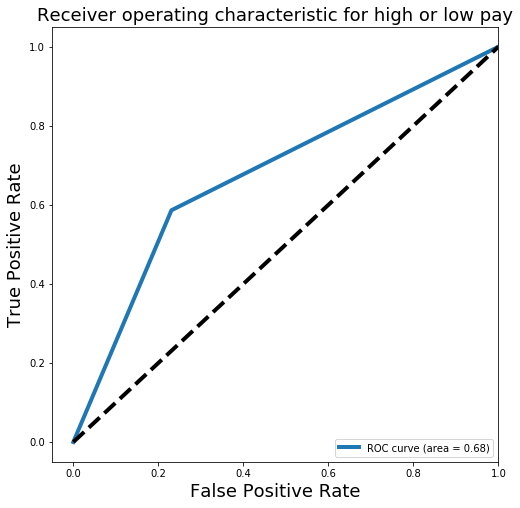

In [82]:
from sklearn.metrics import roc_curve, auc
from sklearn import  metrics
# For class 1, find the area under the curve
fpr, tpr,_ = metrics.roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for high or low pay', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [83]:
##### Try out the sklearn gridsearch below on the training data.
from sklearn.model_selection import GridSearchCV
knn_params = {
    'n_neighbors':range(1,150),
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']}

knn_gridsearch = GridSearchCV(KNeighborsClassifier(), knn_params, cv=15, verbose=1)
knn_gridsearch.fit(X_train, y_train)

Fitting 15 folds for each of 596 candidates, totalling 8940 fits


[Parallel(n_jobs=1)]: Done 8940 out of 8940 | elapsed:  1.8min finished


GridSearchCV(cv=15, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 7... 145, 146, 147, 148, 149], 'metric': ['euclidean', 'manhattan'], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [84]:
#Get the best params for Knn 

print knn_gridsearch.best_score_
print knn_gridsearch.best_params_
best_knn = knn_gridsearch.best_estimator_
print best_knn.score(X_test, y_test)
print 'baseline:', np.mean(y_test)
print 'default KNN:', knn.score(X_test, y_test)

0.6866359447
{'n_neighbors': 20, 'metric': 'euclidean', 'weights': 'uniform'}
0.672727272727
baseline: 0.527272727273
default KNN: 0.672727272727


In [85]:
####there ia no big difference between in default and grid search results. so lets stick to the knn model

### Cross-validation can be used to estimate the test error associated with a learning method in order to evaluate its performance, or to select the appropriate level of flexibility.

In [86]:
# creating odd list of K for KNN 
myList = list(range(1,50))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())


The optimal number of neighbors is 27


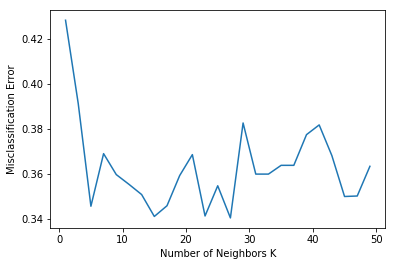

In [87]:
# plot the misclassification error versus K.

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print "The optimal number of neighbors is %d" % optimal_k

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()


In [88]:
knn = KNeighborsClassifier(n_neighbors=27,n_jobs=2)

knn.fit(X_train, y_train)

# CALUCULATE THE ACUURACY AND BASELINE 
print 'KNN Score',knn.score(X_test, y_test), 'Baseline Accuracy',1. - np.mean(y_test),'\n'

# predict test class:
y_pred = knn.predict(X_test)

# predicted test probability:
y_pp = knn.predict_proba(X_test)

print y_pp, '\n\n',y_pred

KNN Score 0.672727272727 Baseline Accuracy 0.472727272727 

[[ 0.48148148  0.51851852]
 [ 0.51851852  0.48148148]
 [ 0.48148148  0.51851852]
 [ 0.51851852  0.48148148]
 [ 0.51851852  0.48148148]
 [ 0.62962963  0.37037037]
 [ 0.55555556  0.44444444]
 [ 0.62962963  0.37037037]
 [ 0.48148148  0.51851852]
 [ 0.85185185  0.14814815]
 [ 0.59259259  0.40740741]
 [ 0.44444444  0.55555556]
 [ 0.7037037   0.2962963 ]
 [ 0.66666667  0.33333333]
 [ 0.7037037   0.2962963 ]
 [ 0.7037037   0.2962963 ]
 [ 0.48148148  0.51851852]
 [ 0.59259259  0.40740741]
 [ 0.22222222  0.77777778]
 [ 0.44444444  0.55555556]
 [ 0.51851852  0.48148148]
 [ 0.55555556  0.44444444]
 [ 0.48148148  0.51851852]
 [ 0.2962963   0.7037037 ]
 [ 0.62962963  0.37037037]
 [ 0.51851852  0.48148148]
 [ 0.51851852  0.48148148]
 [ 0.48148148  0.51851852]
 [ 0.51851852  0.48148148]
 [ 0.7037037   0.2962963 ]
 [ 0.81481481  0.18518519]
 [ 0.51851852  0.48148148]
 [ 0.2962963   0.7037037 ]
 [ 0.37037037  0.62962963]
 [ 0.44444444  0.55555

In [89]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted High', 'Predicted low'],
    index=['True High', 'True Low']
)

,Predicted High,Predicted low
True High,23,3
True Low,15,14


In [90]:
# When compared to RFC, KNN , RFC is performing better. let us build SVM and check how the model performs

## SVM model 

In [91]:
# using grid search let us search best params 
from sklearn import svm
from sklearn.grid_search import GridSearchCV
clf = svm.SVC()

gamma_range = np.logspace(-5, 2, 10)
C_range = np.logspace(-3, 2, 10)
kernel_range = ['rbf', 'sigmoid', 'linear', 'poly']

param_grid = dict(gamma=gamma_range, C=C_range, kernel=kernel_range)

grid = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy', verbose=1)
grid.fit(X_train,y_train)

/Applications/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   11.9s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf', 'sigmoid', 'linear', 'poly'], 'C': array([  1.00000e-03,   3.59381e-03,   1.29155e-02,   4.64159e-02,
         1.66810e-01,   5.99484e-01,   2.15443e+00,   7.74264e+00,
         2.78256e+01,   1.00000e+02]), 'gamma': array([  1.00000e-05,   5.99484e-05,   3.59381e-04,   2.15443e-03,
         1.29155e-02,   7.74264e-02,   4.64159e-01,   2.78256e+00,
         1.66810e+01,   1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=1)

In [92]:
print grid.best_params_
print grid.best_score_

{'kernel': 'rbf', 'C': 100.0, 'gamma': 0.01291549665014884}
0.677419354839


In [93]:
# let us Fit SVM with the best params

from sklearn import svm

# Create SVM classification object 
model = svm.SVC(gamma=0.013,C=100,kernel='rbf') # there is various option associated with it, this is simple for classification.
# # Train the model using the training sets and check score
model.fit(X_train, y_train)
print 'Train Score ',model.score(X_train, y_train)
# #Predict Output
predsvm= model.predict(X_test)

# print 'Test' , model.score(y_test.values,predsvm)

Train Score  0.861751152074


In [94]:
# let us see the cross validation scores 
scores = cross_val_score(model, X_train, y_train, cv=3)
print "Cross-validated scores:\n\n", scores,scores.std(),scores.mean()

Cross-validated scores:

[ 0.63013699  0.71232877  0.69014085] 0.0347183201509 0.677535532832


In [95]:
pd.DataFrame(
    confusion_matrix(y_test,predsvm),
    columns=['Predicted High', 'Predicted low'],
    index=['True High', 'True Low']
)


,Predicted High,Predicted low
True High,14,12
True Low,11,18


In [96]:
# out of KNN , SVM and RFC Random Forest Classifier is performing better . 
# the ROC_AUC value of KNN is nearly .80 much  greater than the Knn and SVM.

In [97]:
# make the clusters for high paying jobs for Skills.

from sklearn.cluster import KMeans
vectorizer = TfidfVectorizer(stop_words='english',use_idf=True)
model = vectorizer.fit_transform(jobs_indeed_df1['Skills'])
km = KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=1)
k=km.fit(model)
terms = vectorizer.get_feature_names()
order_centroids = km.cluster_centers_.argsort()[:,::-1]

for i in range(5):
    print("Cluster of words %d:" %i)
    for ind in order_centroids[i,:10]:
        print(' %s' % terms[ind])
    print "------------------------------------\n"

Cluster of words 0:
 engineer
 data
 scientist
 software
 design
 development
 analyst
 solution
 developing
 api
------------------------------------

Cluster of words 1:
 analyst
 data
 client
 research
 ai
 stakeholder
 sql
 intelligence
 scientist
 design
------------------------------------

Cluster of words 2:
 data
 scientist
 ai
 research
 solution
 development
 modelling
 models
 client
 design
------------------------------------

Cluster of words 3:
 report
 bi
 reporting
 data
 analyst
 ai
 research
 client
 software
 scientist
------------------------------------

Cluster of words 4:
 big
 bi
 data
 engineer
 scientist
 development
 developer
 mapping
 solution
 developing
------------------------------------



In [98]:
# clusters for the Roles with high pay .
from sklearn.cluster import KMeans
vectorizer = TfidfVectorizer(stop_words='english',use_idf=True)
model = vectorizer.fit_transform(jobs_indeed_df1['Title'])
km = KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=1)
k=km.fit(model)
terms = vectorizer.get_feature_names()
order_centroids = km.cluster_centers_.argsort()[:,::-1]

for i in range(5):
    print("Cluster of words %d:" %i)
    for ind in order_centroids[i,:10]:
        print(' %s' % terms[ind])
    print "------------------------------------\n"

Cluster of words 0:
 analyst
 research
 reporting
 data
 senior
 developer
 quantitative
 support
 project
 fellow
------------------------------------

Cluster of words 1:
 analyst
 business
 data
 senior
 ict
 intelligence
 global
 systems
 crm
 brand
------------------------------------

Cluster of words 2:
 scientist
 data
 senior
 level
 mid
 junior
 medical
 australia
 sydney
 cyber
------------------------------------

Cluster of words 3:
 engineer
 data
 big
 aws
 sydney
 senior
 centre
 australia
 integration
 react
------------------------------------

Cluster of words 4:
 software
 engineer
 senior
 lead
 graduate
 principle
 data61
 intermediate
 developer
 junior
------------------------------------



##  Summary


#### we started by collecting the data from INDEED website by scraping for different titles namely 'Data Scientist','Data Analyst','Data Engineer'. we ended up having a data frame of shape 3210 , 5 . The % columns are Title,Company,Salary,State,Description . As most of the data do not have salary values , they needed to be dropped because our problem statement is based on salary .After  loading  into the DataFrame strarted analysing the data , when we did some EDA  and Feature engineering we ended up with data of size 285 , 5.

#### As we know Skills also plays an important role in deciding the salary . I have created a list and of skills required for doing jobs for my search strings in indeed . then i interated my scraped description data and appened it to the datafame by appending the skiils.

#### Type of Job status also impacts the salary so i categriseed the type of job into Fulltime and Contract.

#### after cleaning the data and dropping the duplicate columns . i checked the distribution of salary columns where it was skewed to the right and many outliers when compared with the indepandant variables used for building the model. so i  thought it is better to make salaraies into binary values and classify into high and low based on median values .

#### feature engineered the titles into seven generic roles and cities into 8 general cities and used Count vectorizer for skills and made it as my input data .

#### i have built model with SVM,KNN,Decision Tree and Random Forest . out of four the best result i have acheived is for the Random forest .

#### for clusters i used kmeans for all the input variables and plotted the values .

### so we can conclude that Skill  words with
engineer
 data
 scientist
 software
 design
 development
 analyst
 solution
 developing
 api
                are for High pay.
                
### jobroles with words 
analyst
 research
 reporting
 data
 senior
 developer
 quantitative
 support
 project
 fellow    also consitute for high pay
                
#### used kmeans algorithm to make clusters of words for high pay.




